# Applied Machine Learning Systems ELEC0134 (23/24) Assignment

## TASK A: 
Binary classification task (using PneumoniaMNIST dataset). The objective is to classify an image onto "Normal" (no pneumonia) or "Pneumonia" (presence of pneumonia)

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import random
from time import time
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn import svm

In [31]:
# 0: Normal; 1: Pneumonia
ac = np.load('pneumoniamnist.npz')
ac.files

['train_images',
 'val_images',
 'test_images',
 'train_labels',
 'val_labels',
 'test_labels']

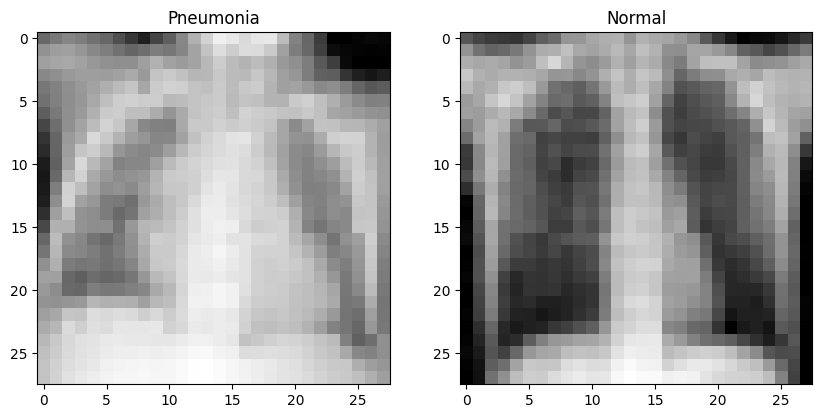

In [32]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.imshow(ac['train_images'][0], cmap='gray')
ax.set_title('Pneumonia')
ax = fig.add_subplot(1, 2, 2)
ax.imshow(ac['train_images'][5], cmap='gray')
ax.set_title('Normal')
plt.show()

In [33]:
x_train, y_train = ac['train_images'], ac['train_labels']
x_val, y_val = ac['val_images'], ac['val_labels']
x_test, y_test= ac['test_images'], ac['test_labels']
x_train, y_train = np.vstack((x_train, x_val)), np.vstack((y_train, y_val))

In [ ]:
x_train, x_test= x_train/255, x_test/255

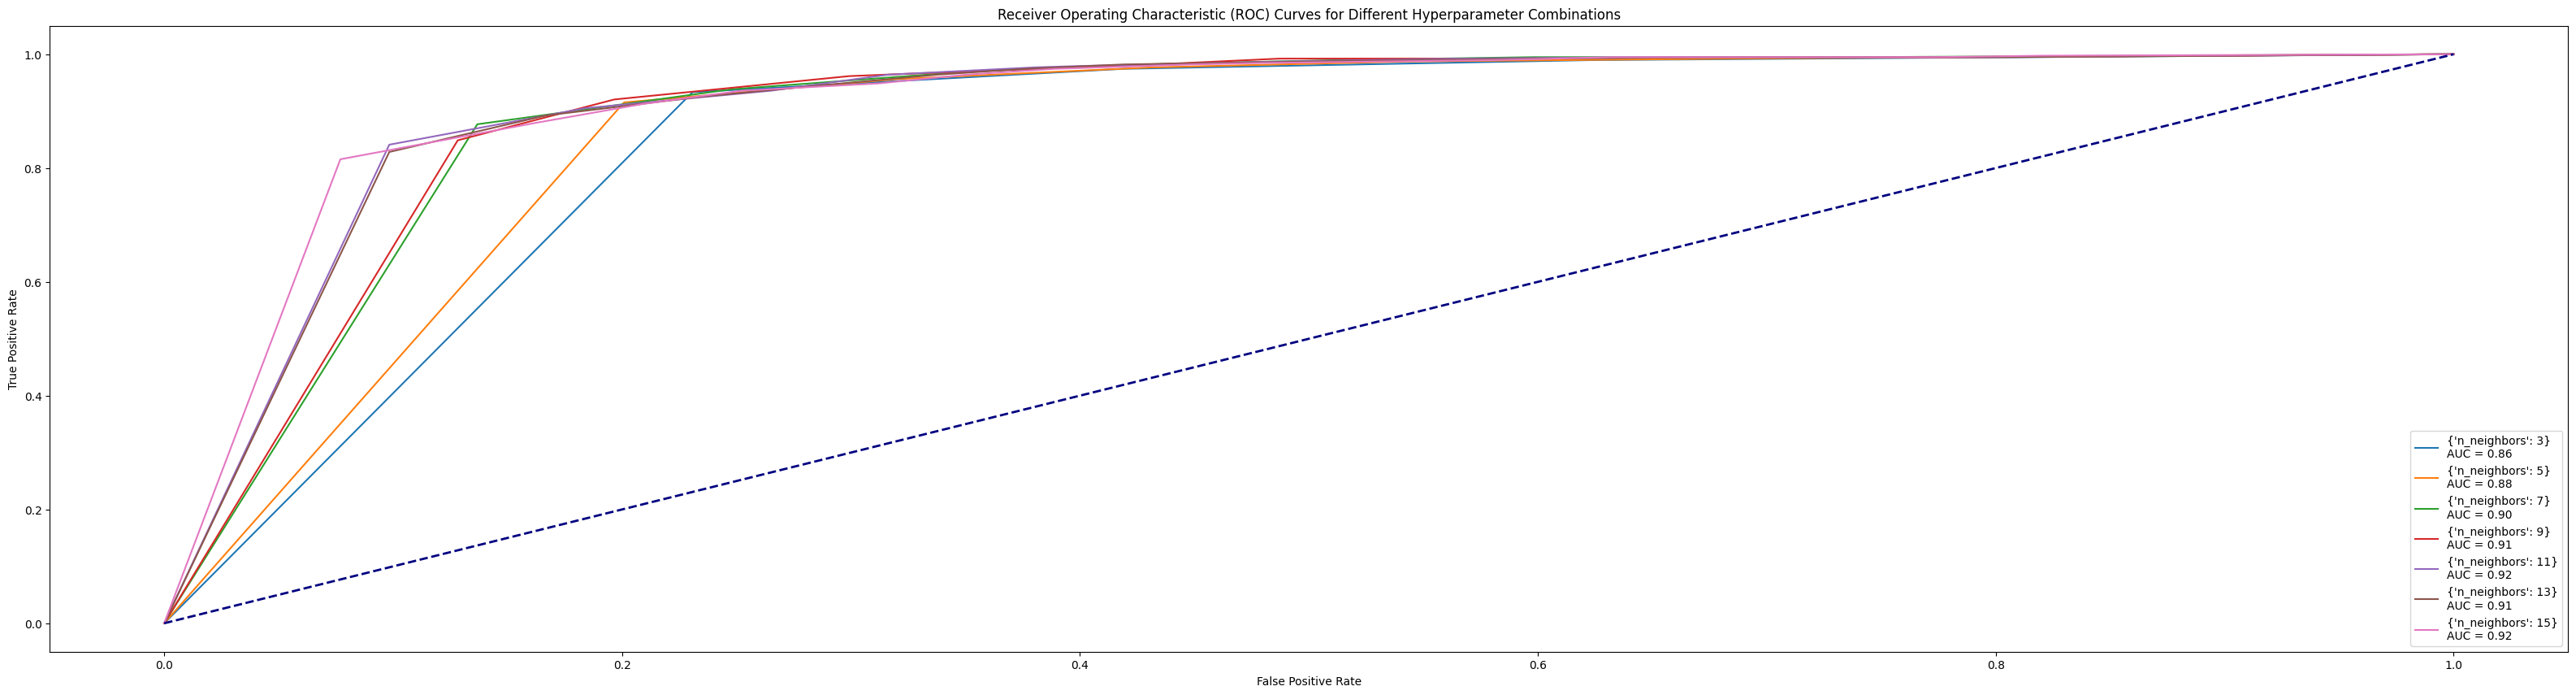

Best Parameters: {'n_neighbors': 9}
Best Accuracy: 0.94839393623957


In [7]:
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
model = KNeighborsClassifier()
param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15]}
grid_search = GridSearchCV(model, param_grid, cv=kf, scoring='accuracy')
grid_search.fit(x_train.reshape(-1, 28*28), y_train.ravel())
results = grid_search.cv_results_
fig = plt.figure(figsize=(40,10))
for i in range(len(results['params'])):
    param_set = results['params'][i]
    mean_test_score = results['mean_test_score'][i]
    model = KNeighborsClassifier(**param_set)
    model.fit(x_train.reshape(-1, 28*28), y_train.ravel())
    y_pred_proba = model.predict_proba(x_test.reshape(-1, 28*28))[:, 1]
    fpr, tpr, _ = roc_curve(y_test.ravel(), y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{param_set}\nAUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for Different Hyperparameter Combinations')
plt.legend(loc='lower right')
plt.show()
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Accuracy: {grid_search.best_score_}')

In [8]:
to = time()
clf = KNeighborsClassifier(**grid_search.best_params_).fit(x_train.reshape(-1, 28*28), y_train.ravel())
print('Training time: {:.5f}s'.format(time() - to))
predictions_labels = clf.predict(x_test.reshape(-1, 28*28))
print('Evaluation:')
print((classification_report(y_test, predictions_labels)))

Training time: 0.00352s
Evaluation:
              precision    recall  f1-score   support

           0       0.94      0.58      0.72       234
           1       0.80      0.98      0.88       390

    accuracy                           0.83       624
   macro avg       0.87      0.78      0.80       624
weighted avg       0.85      0.83      0.82       624



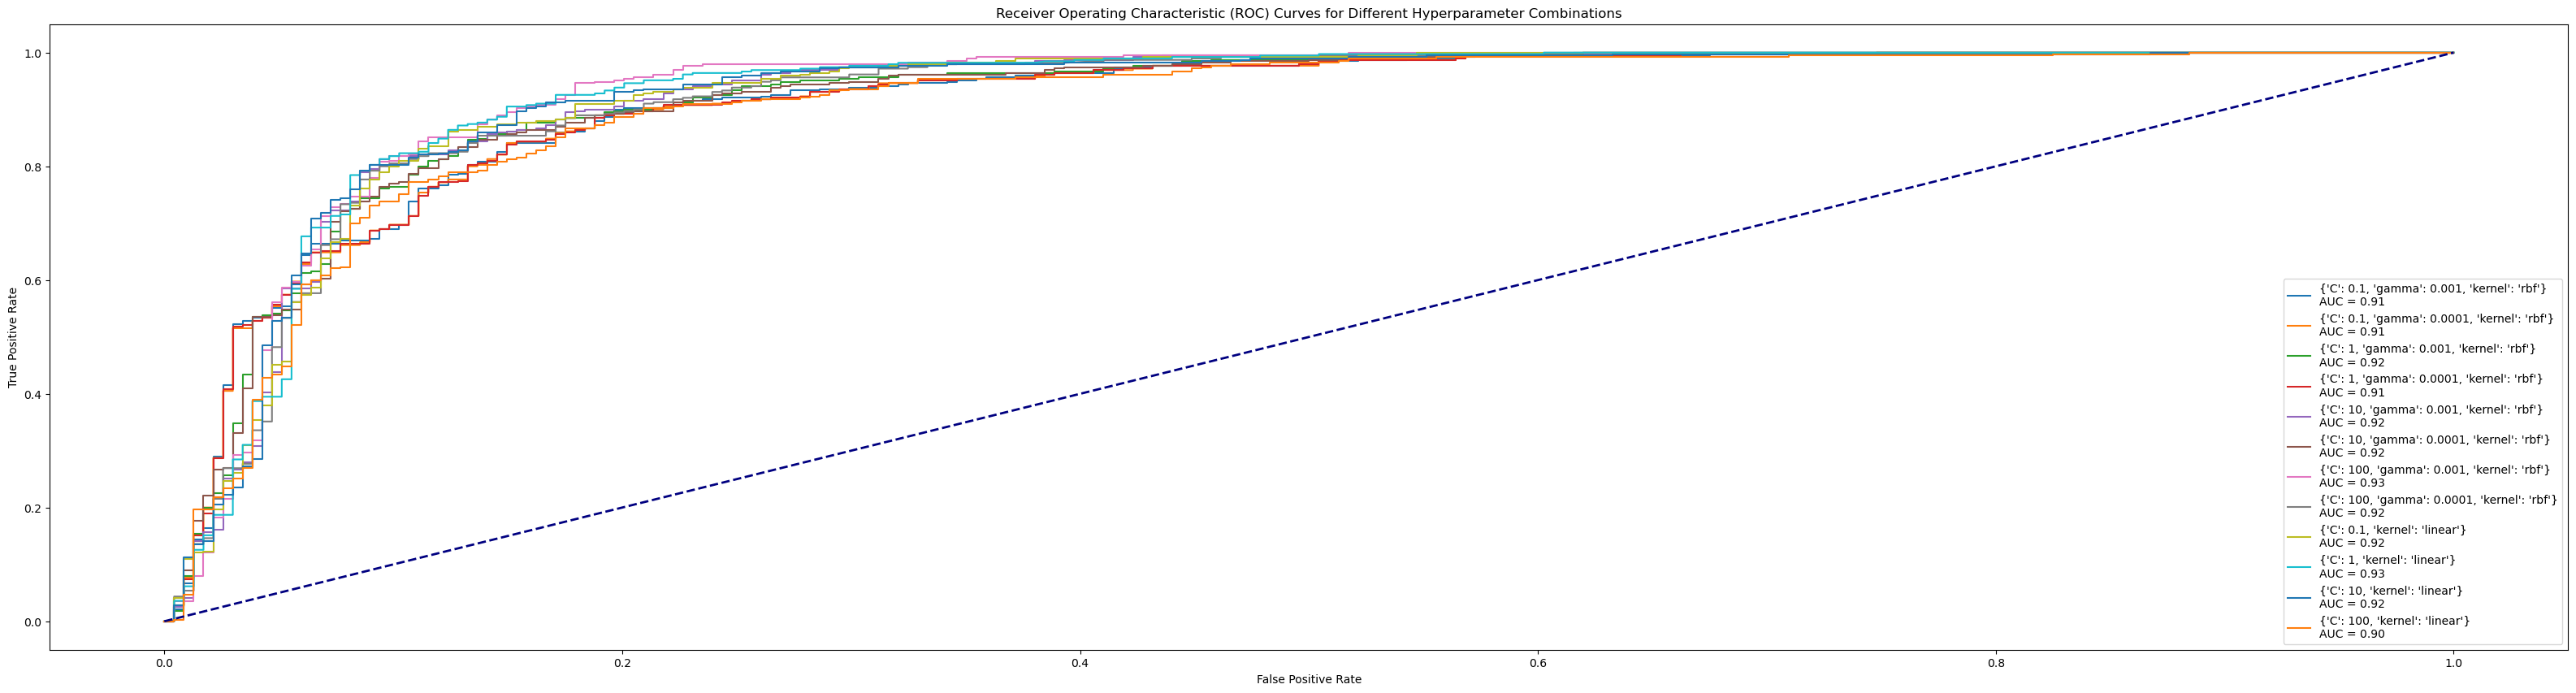

Best Parameters: {'C': 1, 'kernel': 'linear'}
Best Accuracy: 0.961392013236398


In [228]:
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
param_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [0.1, 1, 10, 100]},
              {'kernel': ['linear'], 'C': [0.1, 1, 10, 100]}]
model = svm.SVC()
grid_search = GridSearchCV(model, param_grid, cv=kf, scoring='accuracy')
grid_search.fit(x_train.reshape(-1, 28*28), y_train.ravel())
results = grid_search.cv_results_
fig = plt.figure(figsize=(40,10))
for i in range(len(results['params'])):
    param_set = results['params'][i]
    mean_test_score = results['mean_test_score'][i]
    model = svm.SVC(**param_set, probability=True)
    model.fit(x_train.reshape(-1, 28*28), y_train.ravel())
    y_pred_proba = model.predict_proba(x_test.reshape(-1, 28*28))[:, 1]
    fpr, tpr, _ = roc_curve(y_test.ravel(), y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{param_set}\nAUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for Different Hyperparameter Combinations')
plt.legend(loc='lower right')
plt.show()
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Accuracy: {grid_search.best_score_}')

In [235]:
to =time()
clf = svm.SVC(**grid_search.best_params_).fit(x_train.reshape(-1, 28*28), y_train.ravel())
print('Training time: {:.5f}s'.format(time() - to))
predictions_labels = clf.predict(x_test.reshape(-1, 28*28))
print('\r\nEvaluation:')
print((classification_report(y_test, predictions_labels)))

Training time: 1.44709s

Evaluation:
              precision    recall  f1-score   support

           0       0.95      0.62      0.75       234
           1       0.81      0.98      0.89       390

    accuracy                           0.85       624
   macro avg       0.88      0.80      0.82       624
weighted avg       0.86      0.85      0.84       624



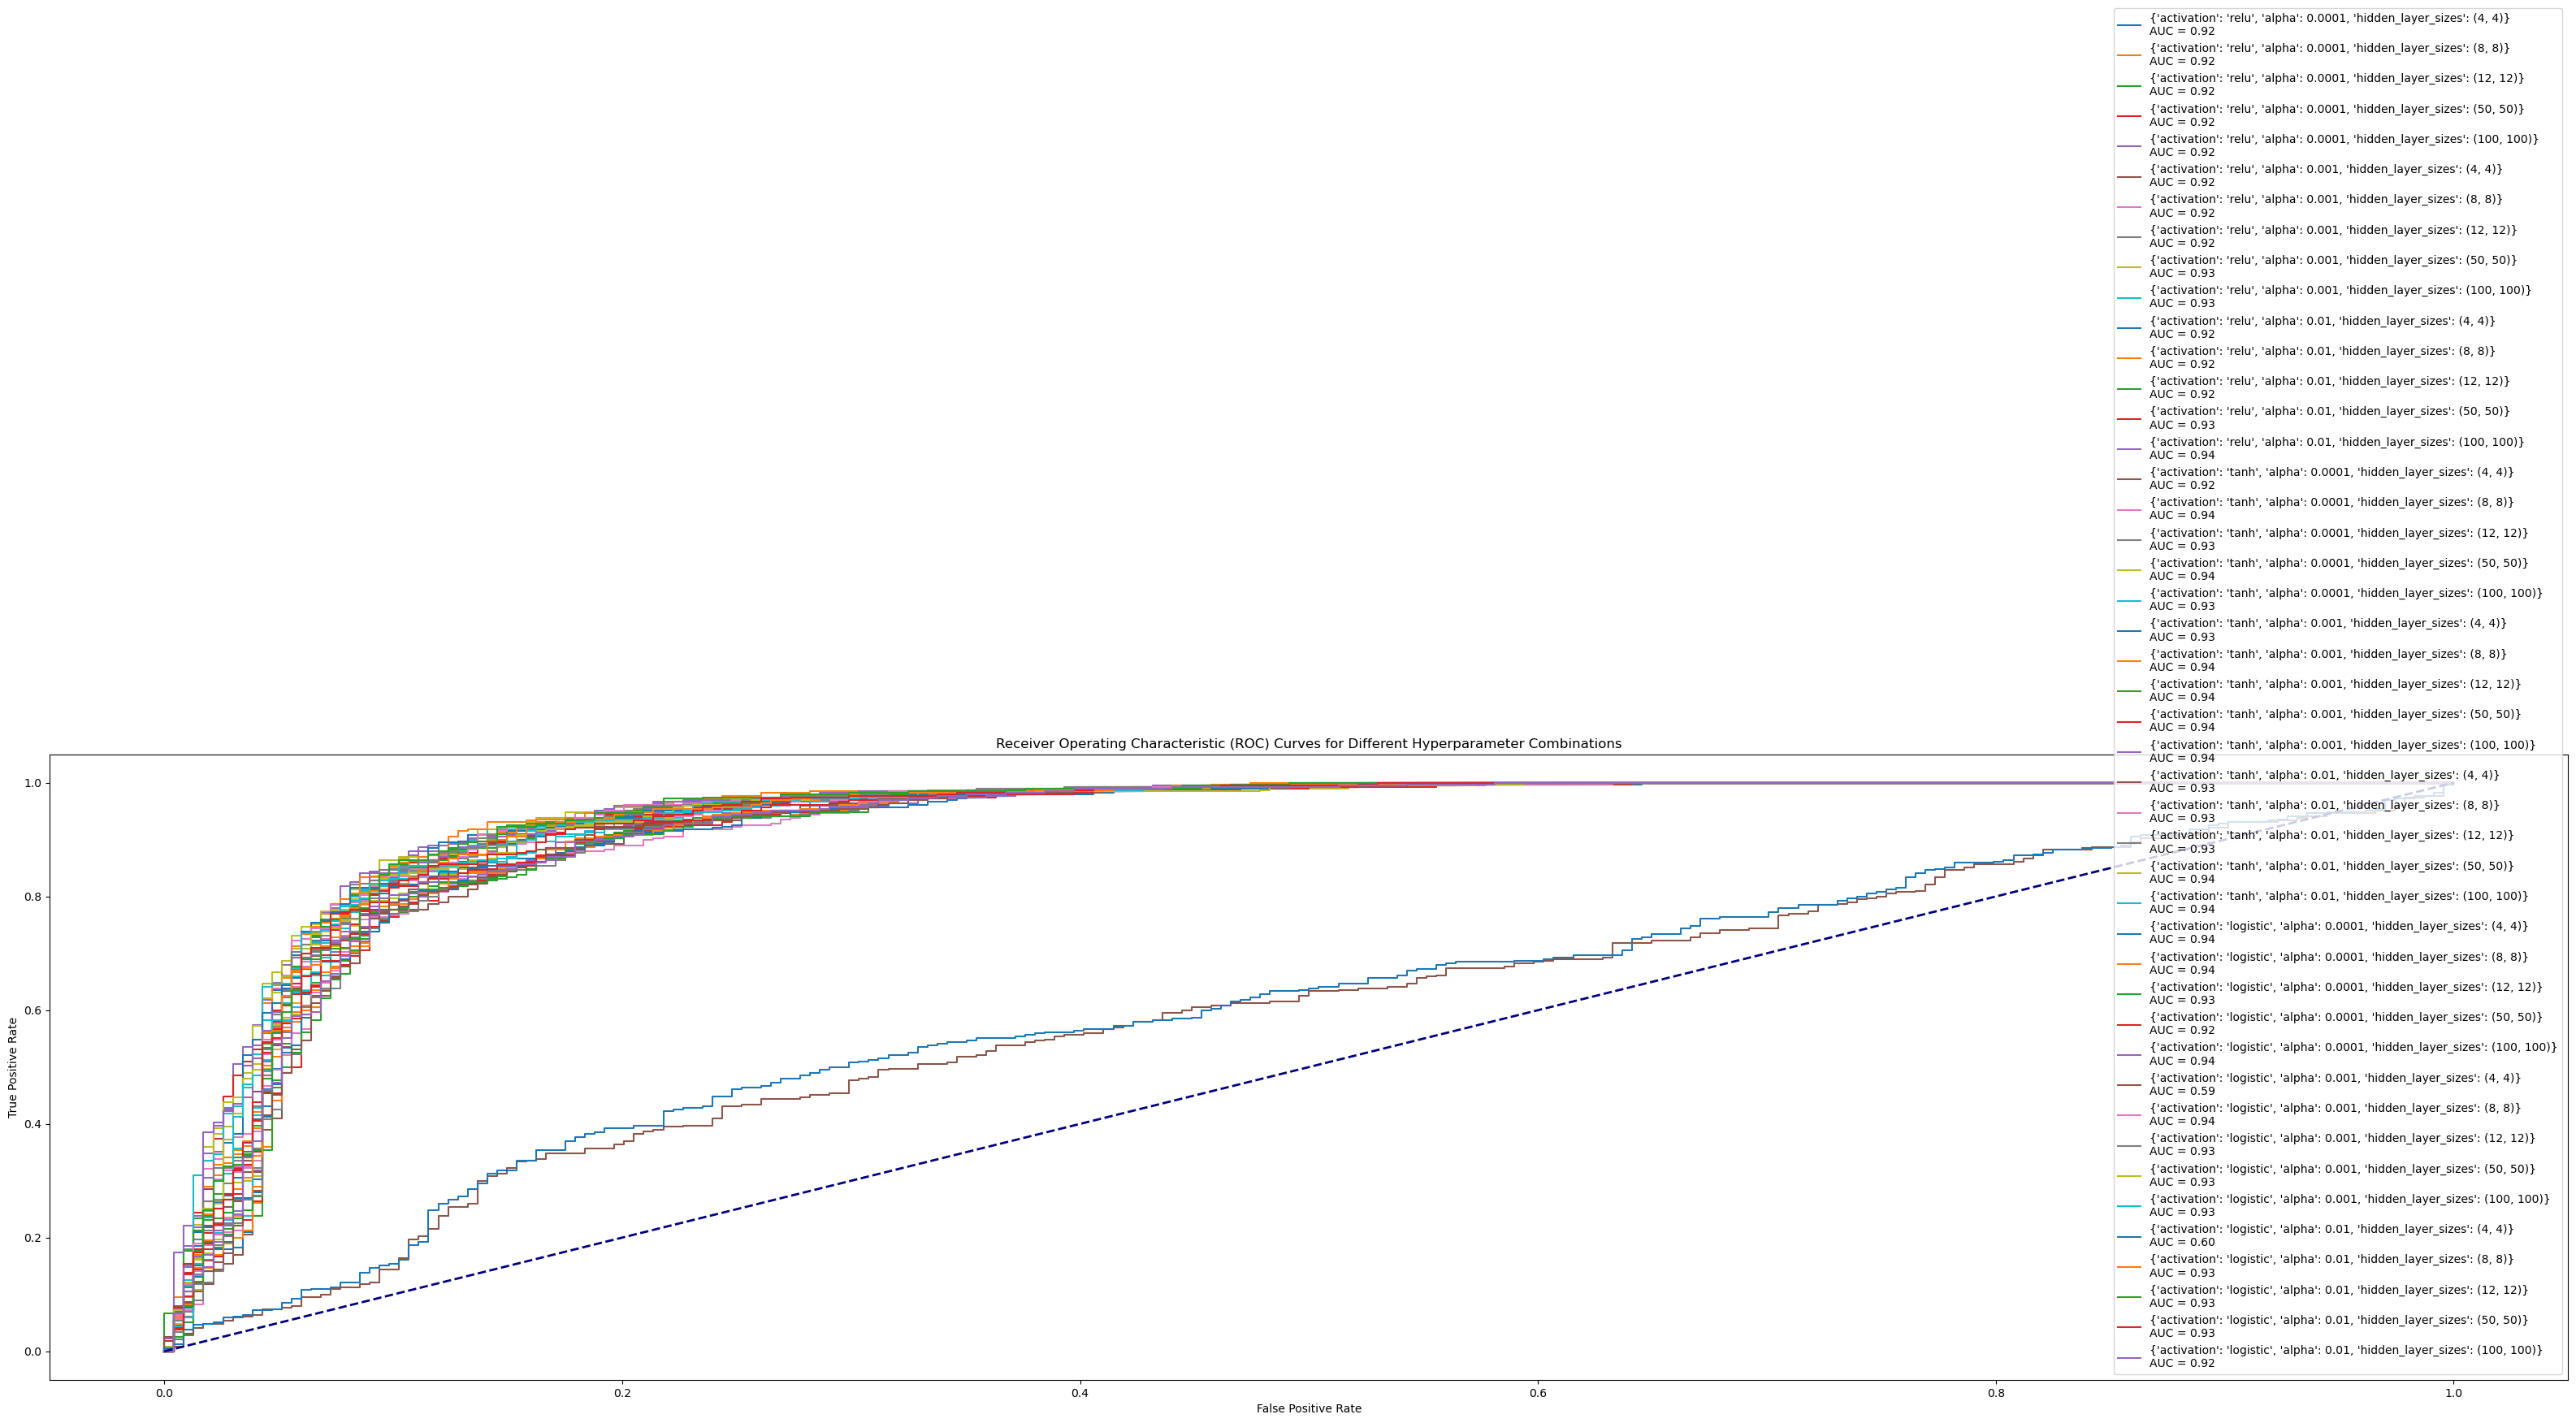

Best Parameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50)}
Best Accuracy: 0.9661697538811609


In [241]:
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
param_grid = {
    'hidden_layer_sizes': [(4, 4,), (8, 8,), (12, 12,), (50, 50,), (100, 100,)],
    'activation': ['relu', 'tanh', 'logistic'],
    'alpha': [0.0001, 0.001, 0.01],
}
model = MLPClassifier(max_iter=1000)
grid_search = GridSearchCV(model, param_grid, cv=kf, scoring='accuracy')
grid_search.fit(x_train.reshape(-1, 28*28), y_train.ravel())
results = grid_search.cv_results_
fig = plt.figure(figsize=(40,10))
for i in range(len(results['params'])):
    param_set = results['params'][i]
    mean_test_score = results['mean_test_score'][i]
    model = MLPClassifier(**param_set, max_iter=1000)
    model.fit(x_train.reshape(-1, 28*28), y_train.ravel())
    y_pred_proba = model.predict_proba(x_test.reshape(-1, 28*28))[:, 1]
    fpr, tpr, _ = roc_curve(y_test.ravel(), y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{param_set}\nAUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for Different Hyperparameter Combinations')
plt.legend(loc='lower right')
plt.show()
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Accuracy: {grid_search.best_score_}')

In [243]:
to =time()
clf = MLPClassifier(**grid_search.best_params_, max_iter=1000).fit(x_train.reshape(-1, 28*28), y_train.ravel())
print('Training time: {:.5f}s'.format(time() - to))
predictions_labels = clf.predict(x_test.reshape(-1, 28*28))
print('\r\nEvaluation:')
print((classification_report(y_test, predictions_labels)))

Training time: 18.12568s

Evaluation:
              precision    recall  f1-score   support

           0       0.96      0.65      0.78       234
           1       0.82      0.98      0.90       390

    accuracy                           0.86       624
   macro avg       0.89      0.82      0.84       624
weighted avg       0.88      0.86      0.85       624



In [3]:
class Augment():
    def __init__(self):
        self.inv_prob = 0.5
        self.blur_prob = 0.3
        self.sq_blur_prob = 0.3
        self.bright_prob = 0.5
        self.rotate_prob = 1.
        self.gray_prob = 0.0
 
    def invert(self, image): 
        return 255 - image
 
    def blur(self, image):
        return cv2.blur(image, (3, 3))
 
    def sq_blur(self, image):
        image = cv2.resize(image, (28, 28), interpolation=cv2.INTER_AREA)
        return image
 
    def random_brightness(self, image): 
        c = random.uniform(0.2, 1.8)
        blank = np.zeros(image.shape, image.dtype)
        dst = cv2.addWeighted(image, c, blank, 1 - c, 0)
        return dst
 
    def rotate(self, image, scale=1.0): 
        angle = random.uniform(-5, 5)
        h, w = image.shape[:2]
        center = (w // 2, h // 2)
        M = cv2.getRotationMatrix2D(center, angle, scale)
        rotated = cv2.warpAffine(image, M, (w, h))
        return rotated
 
    def gray_scale(self, image):
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        dst = cv2.merge((gray, gray, gray))
        return dst
 
    def apply(self, image):
        inv_prob = random.random()
        blur_prob = random.random()
        sq_blur_prob = random.random()
        bright_prob = random.random()
        rotate_prob = random.random()
 
        if inv_prob < self.inv_prob:
            image = self.invert(image)
 
        if bright_prob < self.bright_prob:
            image = self.random_brightness(image)
 
        if rotate_prob < self.rotate_prob:
            image = self.rotate(image)
 
        if blur_prob < self.blur_prob:
            image = self.blur(image)
 
        if sq_blur_prob < self.sq_blur_prob:
            image = self.sq_blur(image)
 
        return image

28
28


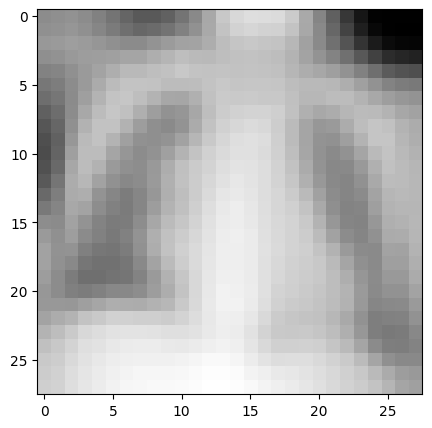

In [34]:
a = Augment()
t = a.blur(ac['train_images'][0])
print(len(ac['train_images'][0]))
print(len(t))
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 1, 1)
ax.imshow(t, cmap='gray')

In [35]:
x_train_aug = []
y_train_aug = []
aug = Augment()
for i in range(1000):
    idx = random.randint(0, len(x_train)-1)
    fig = x_train[idx]
    y = y_train[idx]
    fig_t = aug.apply(fig)
    x_train_aug.append(fig_t)
    y_train_aug.append(y)
x_train_aug, y_train_aug = np.array(x_train_aug), np.array(y_train_aug)
x_train_aug, y_train_aug = np.vstack((x_train, x_train_aug)), np.vstack((y_train, y_train_aug))

In [53]:
x_train_aug, x_test = x_train_aug/255, x_test/255

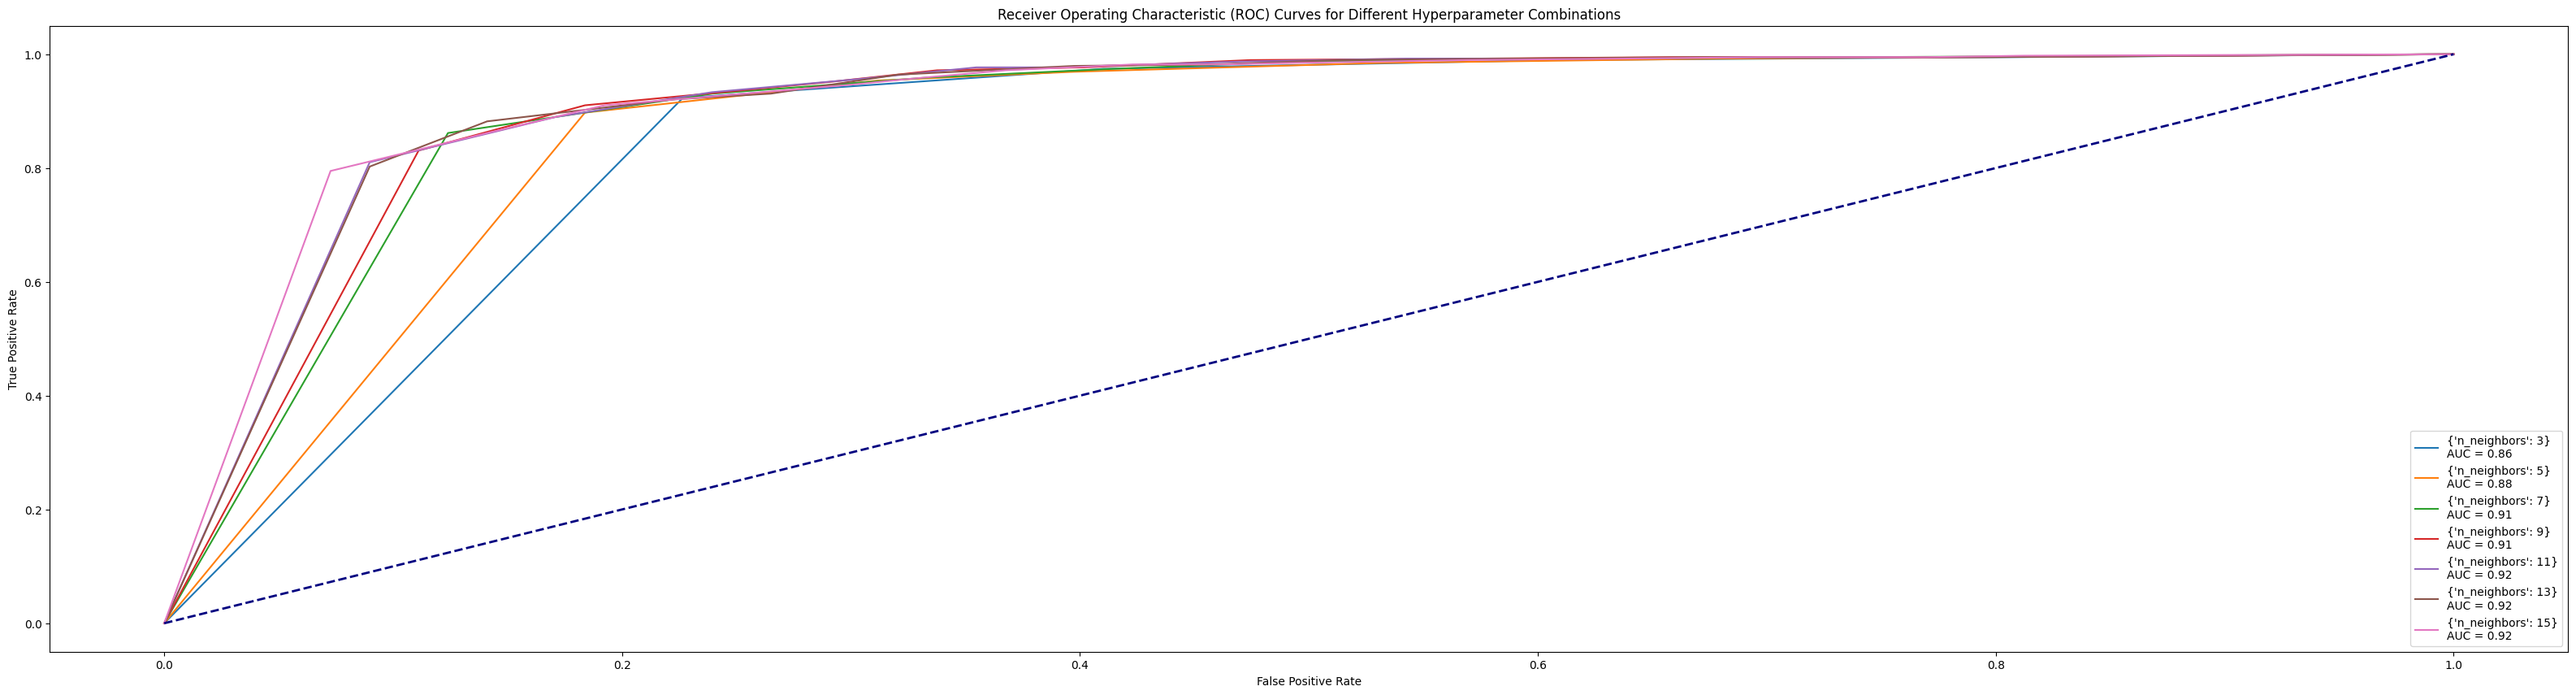

Best Parameters: {'n_neighbors': 11}
Best Accuracy: 0.9364566774061922


In [54]:
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
model = KNeighborsClassifier()
param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15]}
grid_search = GridSearchCV(model, param_grid, cv=kf, scoring='accuracy')
grid_search.fit(x_train_aug.reshape(-1, 28*28), y_train_aug.ravel())
results = grid_search.cv_results_
fig = plt.figure(figsize=(40,10))
for i in range(len(results['params'])):
    param_set = results['params'][i]
    mean_test_score = results['mean_test_score'][i]
    model = KNeighborsClassifier(**param_set)
    model.fit(x_train_aug.reshape(-1, 28*28), y_train_aug.ravel())
    y_pred_proba = model.predict_proba(x_test.reshape(-1, 28*28))[:, 1]
    fpr, tpr, _ = roc_curve(y_test.ravel(), y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{param_set}\nAUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for Different Hyperparameter Combinations')
plt.legend(loc='lower right')
plt.show()
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Accuracy: {grid_search.best_score_}')

In [55]:
to = time()
clf = KNeighborsClassifier(**grid_search.best_params_).fit(x_train_aug.reshape(-1, 28*28), y_train_aug.ravel())
print('Training time: {:.5f}s'.format(time() - to))
predictions_labels = clf.predict(x_test.reshape(-1, 28*28))
print('Evaluation:')
print((classification_report(y_test, predictions_labels)))

Training time: 0.00446s
Evaluation:
              precision    recall  f1-score   support

           0       0.94      0.61      0.74       234
           1       0.81      0.98      0.88       390

    accuracy                           0.84       624
   macro avg       0.87      0.79      0.81       624
weighted avg       0.86      0.84      0.83       624



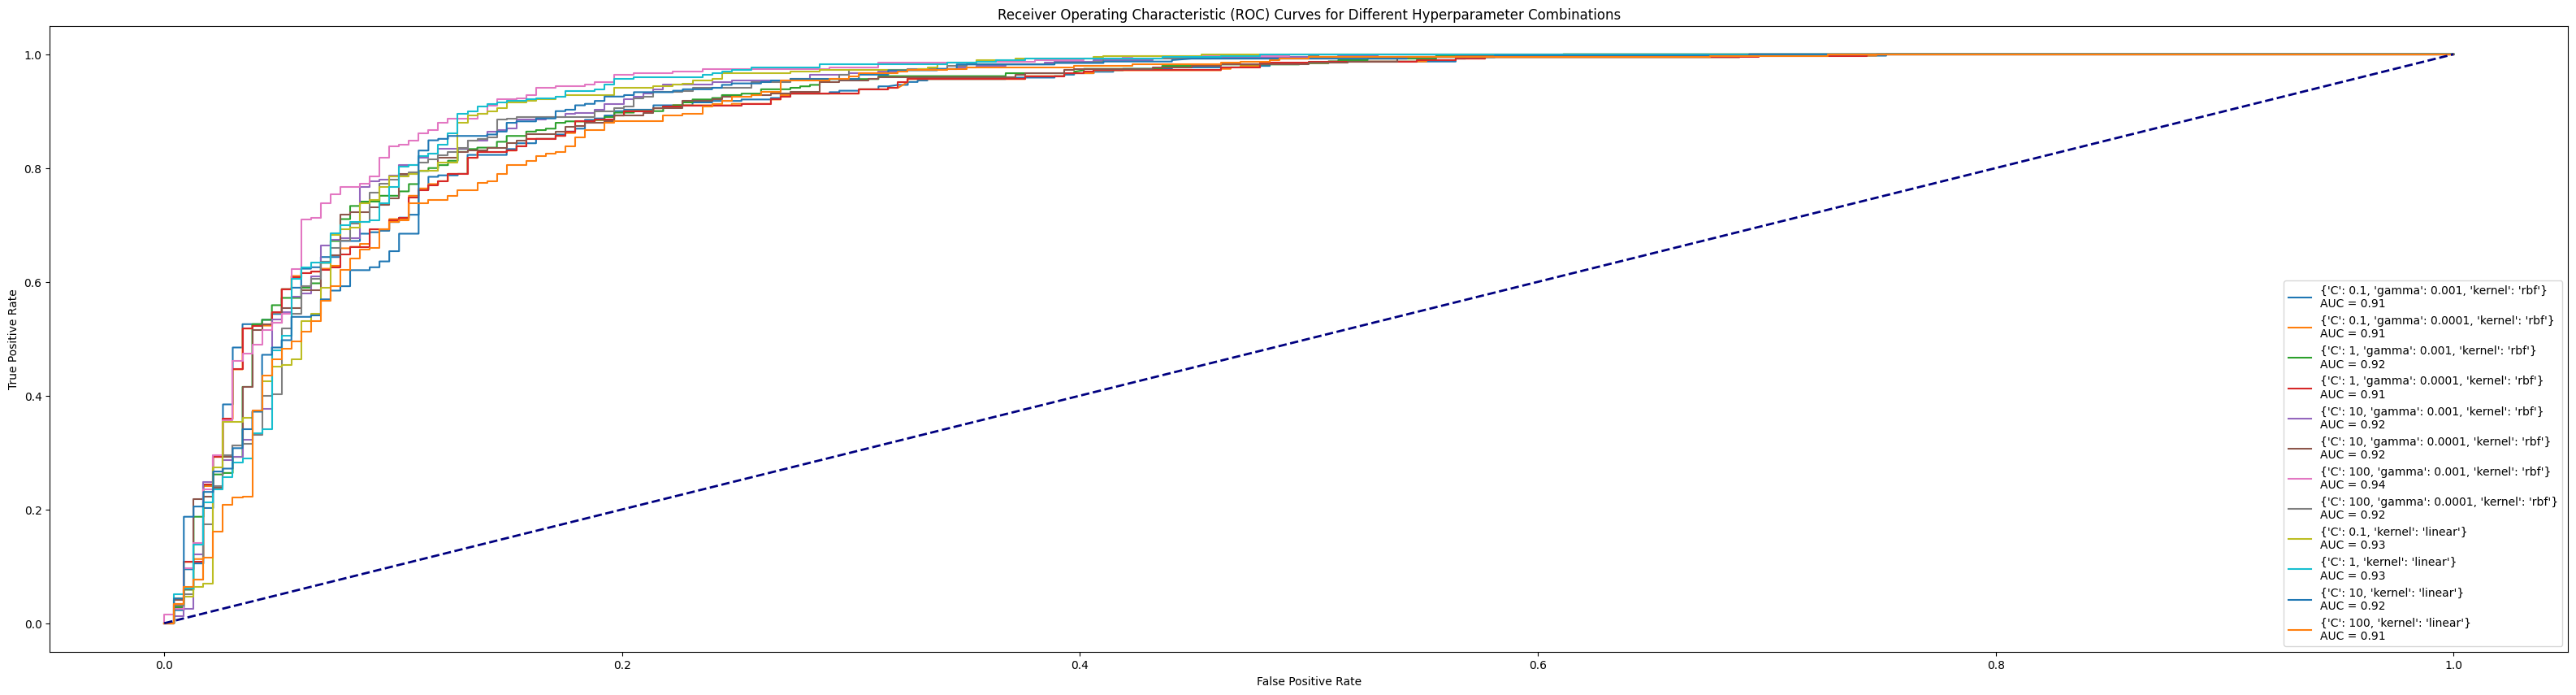

Best Parameters: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
Best Accuracy: 0.9409484850318132


In [56]:
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
param_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [0.1, 1, 10, 100]},
              {'kernel': ['linear'], 'C': [0.1, 1, 10, 100]}]
model = svm.SVC()
grid_search = GridSearchCV(model, param_grid, cv=kf, scoring='accuracy')
grid_search.fit(x_train_aug.reshape(-1, 28*28), y_train_aug.ravel())
results = grid_search.cv_results_
fig = plt.figure(figsize=(40,10))
for i in range(len(results['params'])):
    param_set = results['params'][i]
    mean_test_score = results['mean_test_score'][i]
    model = svm.SVC(**param_set, probability=True)
    model.fit(x_train_aug.reshape(-1, 28*28), y_train_aug.ravel())
    y_pred_proba = model.predict_proba(x_test.reshape(-1, 28*28))[:, 1]
    fpr, tpr, _ = roc_curve(y_test.ravel(), y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{param_set}\nAUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for Different Hyperparameter Combinations')
plt.legend(loc='lower right')
plt.show()
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Accuracy: {grid_search.best_score_}')

In [57]:
to =time()
clf = svm.SVC(**grid_search.best_params_).fit(x_train_aug.reshape(-1, 28*28), y_train_aug.ravel())
print('Training time: {:.5f}s'.format(time() - to))
predictions_labels = clf.predict(x_test.reshape(-1, 28*28))
print('\r\nEvaluation:')
print((classification_report(y_test, predictions_labels)))

Training time: 2.32902s

Evaluation:
              precision    recall  f1-score   support

           0       0.97      0.62      0.76       234
           1       0.81      0.99      0.89       390

    accuracy                           0.85       624
   macro avg       0.89      0.80      0.82       624
weighted avg       0.87      0.85      0.84       624



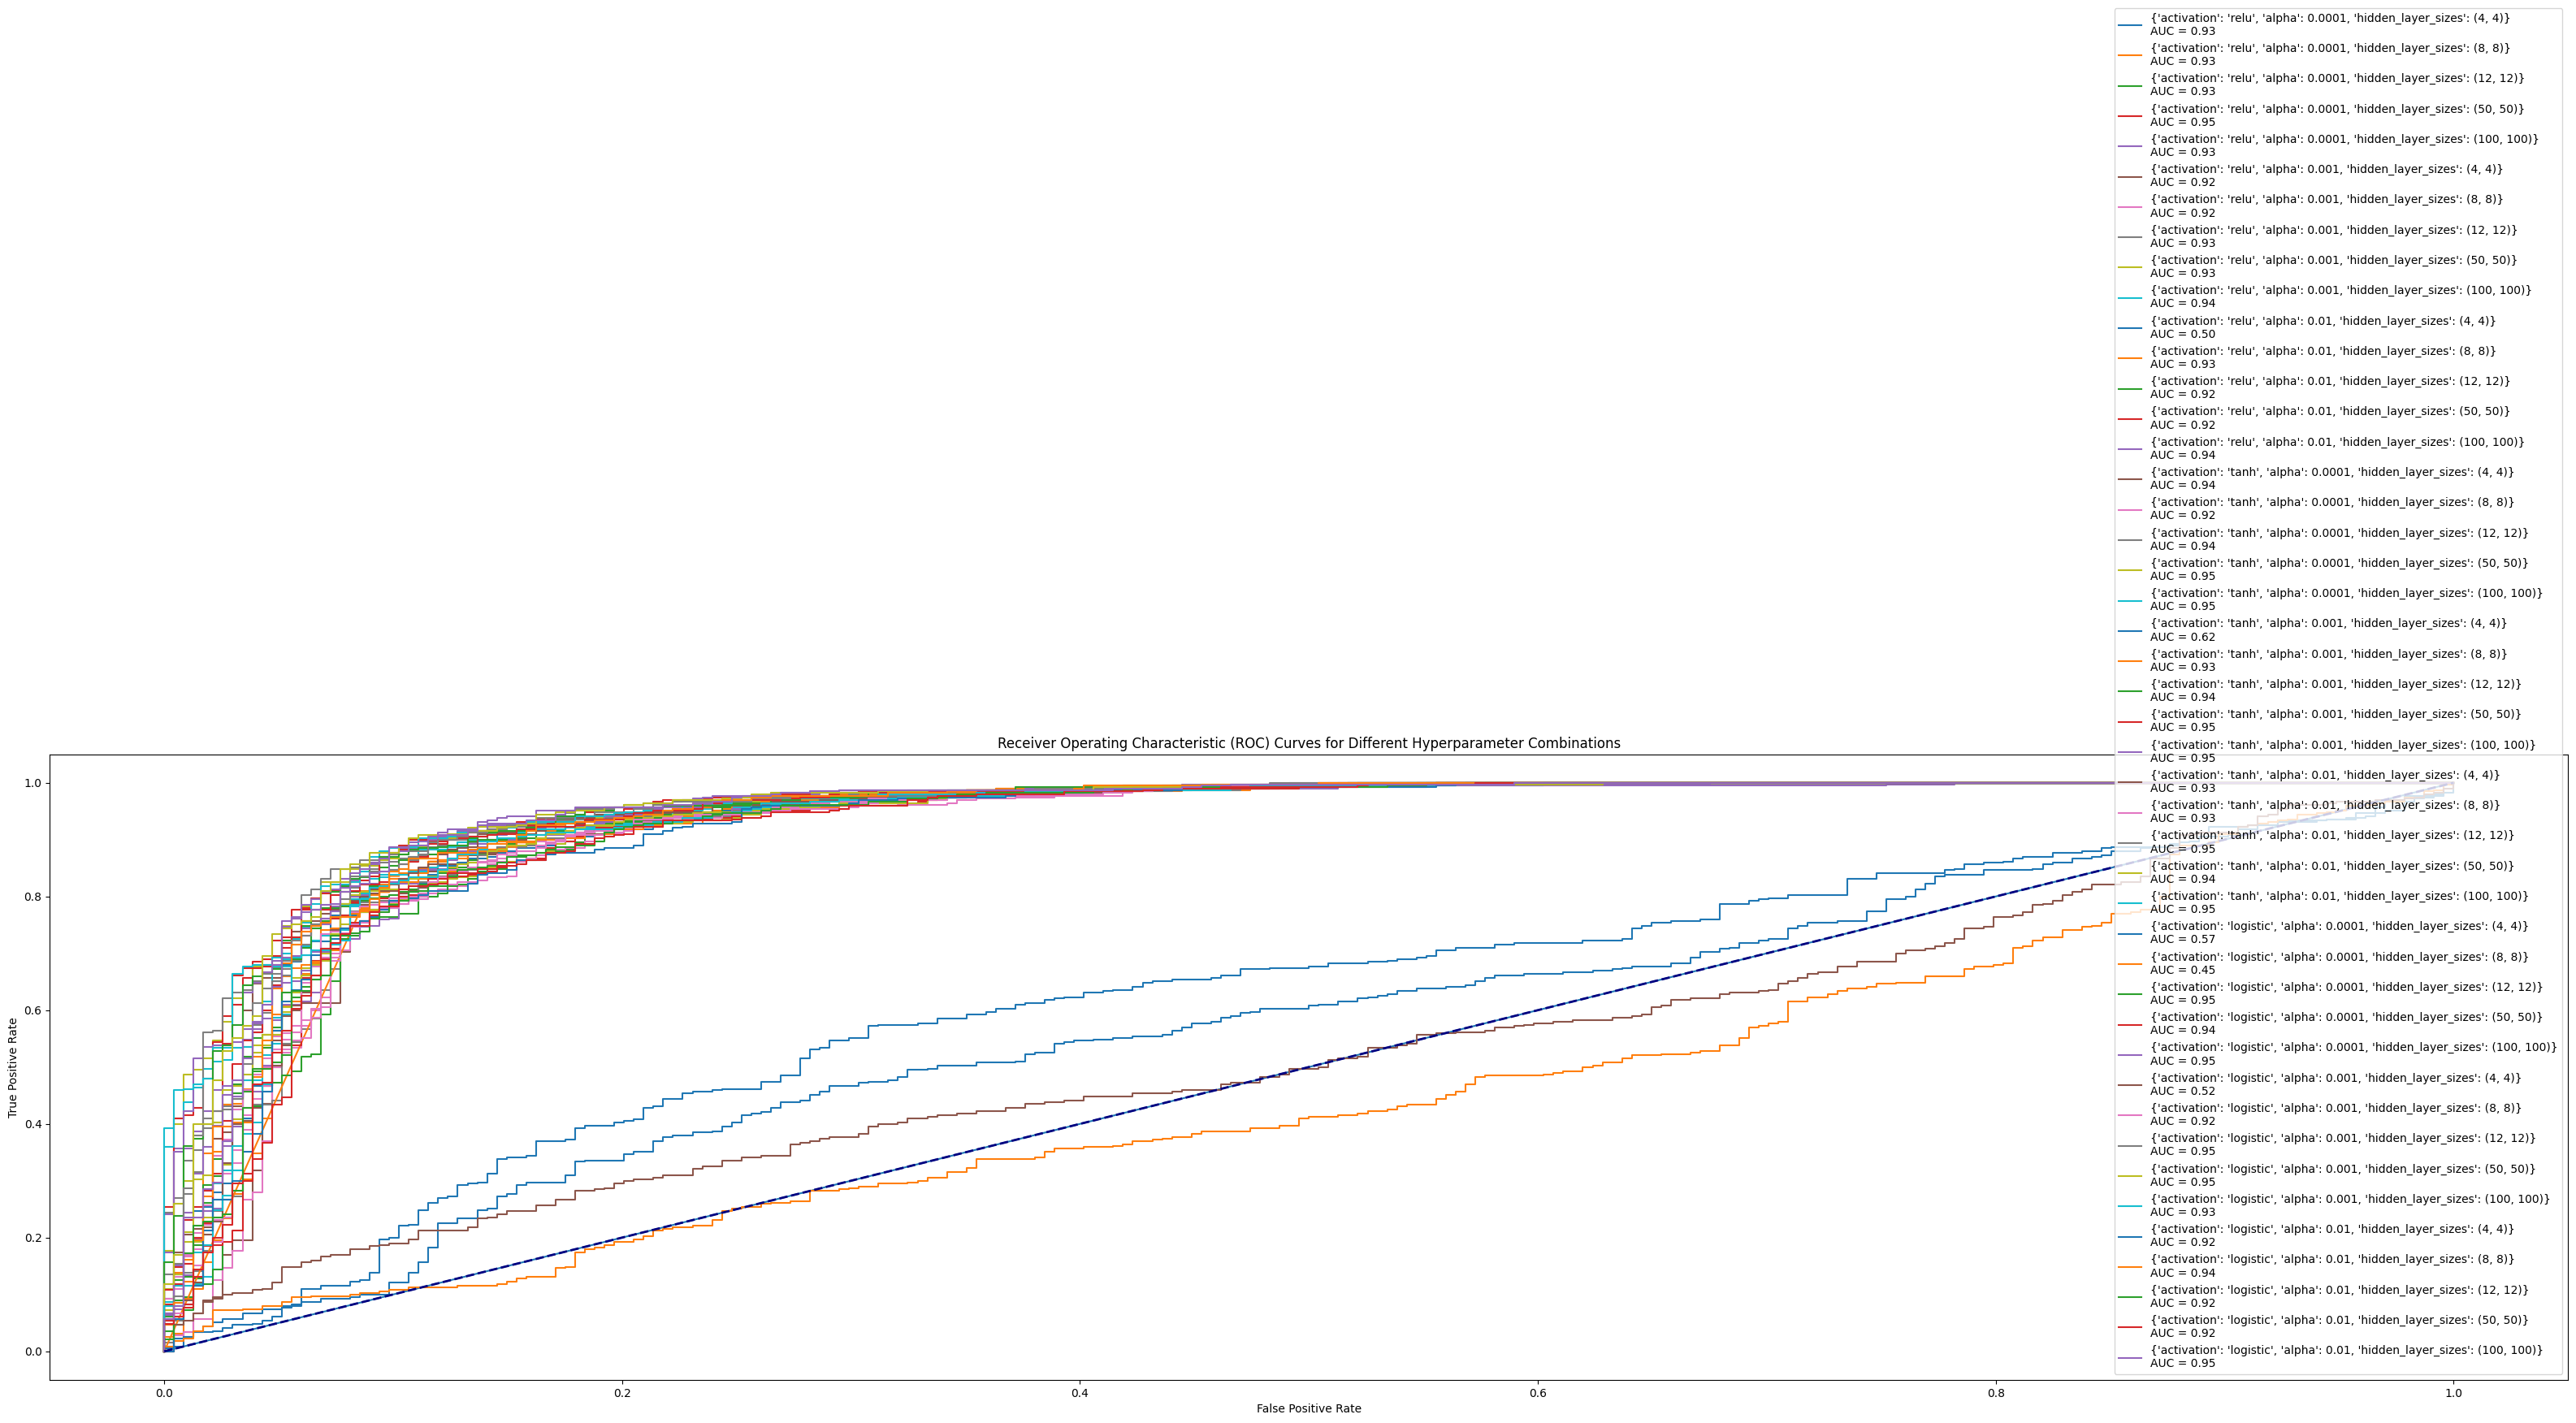

Best Parameters: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (50, 50)}
Best Accuracy: 0.9630931893044108


In [58]:
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
param_grid = {
    'hidden_layer_sizes': [(4, 4,), (8, 8,), (12, 12,), (50, 50,), (100, 100,)],
    'activation': ['relu', 'tanh', 'logistic'],
    'alpha': [0.0001, 0.001, 0.01],
}
model = MLPClassifier(max_iter=1000)
grid_search = GridSearchCV(model, param_grid, cv=kf, scoring='accuracy')
grid_search.fit(x_train_aug.reshape(-1, 28*28), y_train_aug.ravel())
results = grid_search.cv_results_
fig = plt.figure(figsize=(40,10))
for i in range(len(results['params'])):
    param_set = results['params'][i]
    mean_test_score = results['mean_test_score'][i]
    model = MLPClassifier(**param_set, max_iter=1000)
    model.fit(x_train_aug.reshape(-1, 28*28), y_train_aug.ravel())
    y_pred_proba = model.predict_proba(x_test.reshape(-1, 28*28))[:, 1]
    fpr, tpr, _ = roc_curve(y_test.ravel(), y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{param_set}\nAUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for Different Hyperparameter Combinations')
plt.legend(loc='lower right')
plt.show()
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Accuracy: {grid_search.best_score_}')

In [59]:
to =time()
clf = MLPClassifier(**grid_search.best_params_, max_iter=1000).fit(x_train_aug.reshape(-1, 28*28), y_train_aug.ravel())
print('Training time: {:.5f}s'.format(time() - to))
predictions_labels = clf.predict(x_test.reshape(-1, 28*28))
print('\r\nEvaluation:')
print((classification_report(y_test, predictions_labels)))

Training time: 6.22079s

Evaluation:
              precision    recall  f1-score   support

           0       0.98      0.54      0.69       234
           1       0.78      0.99      0.87       390

    accuracy                           0.82       624
   macro avg       0.88      0.77      0.78       624
weighted avg       0.85      0.82      0.81       624



In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import torch.optim as optim
from torch.utils.data import DataLoader

In [11]:
class get_dataset():
    def __init__(self, data, labels:np.array, transforms=None):
        self.data = data
        self.labels = labels.ravel()
        self.transforms = transforms
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        x = self.data[idx]
        label = self.labels[idx]
        if self.transforms:
            x = self.transforms(x)
        return x, label
    

In [36]:
NUM_EPOCHS = 50
BATCH_SIZE = 16
NUM_CLASSES = 2
GRAYSCALE = True
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

data_transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=[.5], std=[.5])])

PneumoniaMNIST_train = get_dataset(x_train_aug, y_train_aug, transforms=data_transform)
PneumoniaMNIST_train = DataLoader(PneumoniaMNIST_train, batch_size=BATCH_SIZE, shuffle=True)

PneumoniaMNIST_test = get_dataset(x_test, y_test, transforms=data_transform)
PneumoniaMNIST_test = DataLoader(PneumoniaMNIST_test, batch_size=BATCH_SIZE, shuffle=True)

In [38]:
def conv3x3(in_planes, out_planes, stride=1):
    """3x3 convolution with padding"""
    return nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=stride,
                     padding=1, bias=False)


class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, inplanes, planes, stride=1, downsample=None):
        super(BasicBlock, self).__init__()
        self.conv1 = conv3x3(inplanes, planes, stride)
        self.bn1 = nn.BatchNorm2d(planes)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = conv3x3(planes, planes)
        self.bn2 = nn.BatchNorm2d(planes)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        residual = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)

        if self.downsample is not None:
            residual = self.downsample(x)

        out += residual
        out = self.relu(out)

        return out




class ResNet(nn.Module):

    def __init__(self, block, layers, num_classes, grayscale):
        self.inplanes = 64
        if grayscale:
            in_dim = 1
        else:
            in_dim = 3
        super(ResNet, self).__init__()
        self.conv1 = nn.Conv2d(in_dim, 64, kernel_size=7, stride=2, padding=3,
                               bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.layer1 = self._make_layer(block, 64, layers[0])
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2)
        self.layer3 = self._make_layer(block, 256, layers[2], stride=2)
        self.layer4 = self._make_layer(block, 512, layers[3], stride=2)
        self.avgpool = nn.AvgPool2d(7, stride=1)
        self.fc = nn.Linear(512 * block.expansion, num_classes)

        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                n = m.kernel_size[0] * m.kernel_size[1] * m.out_channels
                m.weight.data.normal_(0, (2. / n)**.5)
            elif isinstance(m, nn.BatchNorm2d):
                m.weight.data.fill_(1)
                m.bias.data.zero_()

    def _make_layer(self, block, planes, blocks, stride=1):
        downsample = None
        if stride != 1 or self.inplanes != planes * block.expansion:
            downsample = nn.Sequential(
                nn.Conv2d(self.inplanes, planes * block.expansion,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(planes * block.expansion),
            )

        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample))
        self.inplanes = planes * block.expansion
        for i in range(1, blocks):
            layers.append(block(self.inplanes, planes))

        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        # because MNIST is already 1x1 here:
        # disable avg pooling
        #x = self.avgpool(x)
        
        x = x.view(x.size(0), -1)
        logits = self.fc(x)
        probas = F.softmax(logits, dim=1)
        return logits, probas

def compute_accuracy(model, data_loader, device):
    correct_pred, num_examples = 0, 0
    for i, (features, targets) in enumerate(data_loader):
            
        features = features.to(device)
        targets = targets.to(device)

        logits, probas = model(features)
        _, predicted_labels = torch.max(probas, 1)
        num_examples += targets.size(0)
        correct_pred += (predicted_labels == targets).sum()
    return correct_pred.float()/num_examples * 100    

def resnet18(num_classes, grayscale):
    """Constructs a ResNet-18 model."""
    model = ResNet(block=BasicBlock, 
                   layers=[2, 2, 2, 2],
                   num_classes=num_classes,
                   grayscale=grayscale)
    return model

In [38]:
model = resnet18(NUM_CLASSES, GRAYSCALE)
model.to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3) 

avg_cost = []
train_acc = []
test_acc = []

for epoch in range(NUM_EPOCHS):
    
    model.train()
    c = 0
    for batch_idx, (features, targets) in enumerate(PneumoniaMNIST_train):
        
        features = features.to(device)
        targets = targets.to(device)
            
        ### FORWARD AND BACK PROP
        logits, probas = model(features)
        cost = F.cross_entropy(logits, targets)
        optimizer.zero_grad()
        
        cost.backward()
        
        ### UPDATE MODEL PARAMETERS
        optimizer.step()
        
        ### LOGGING
        if not batch_idx % 50:
            print ('Epoch: %03d/%03d | Batch %04d/%04d | Cost: %.4f' 
                   %(epoch+1, NUM_EPOCHS, batch_idx, 
                     len(PneumoniaMNIST_train), cost))
        c += cost
    avg_cost.append(c.item()/len(PneumoniaMNIST_train))

    model.eval()
    with torch.set_grad_enabled(False): # save memory during inference
        acc = compute_accuracy(model, PneumoniaMNIST_train, device=device)
        train_acc.append(acc.item())
        print('Epoch: %03d/%03d | Train: %.3f%%' % (epoch+1, NUM_EPOCHS, acc))
        acc = compute_accuracy(model, PneumoniaMNIST_test, device=device)
        test_acc.append(acc.item())        
        print('Epoch: %03d/%03d | Test: %.3f%%' % (epoch+1, NUM_EPOCHS, acc))
        print('----------------------------------')

Epoch: 001/050 | Batch 0000/0390 | Cost: 0.8406
Epoch: 001/050 | Batch 0050/0390 | Cost: 0.1989
Epoch: 001/050 | Batch 0100/0390 | Cost: 0.1444
Epoch: 001/050 | Batch 0150/0390 | Cost: 0.2326
Epoch: 001/050 | Batch 0200/0390 | Cost: 0.1983
Epoch: 001/050 | Batch 0250/0390 | Cost: 0.1519
Epoch: 001/050 | Batch 0300/0390 | Cost: 0.0584
Epoch: 001/050 | Batch 0350/0390 | Cost: 0.0998
Epoch: 001/050 | Train: 94.528%
Epoch: 001/050 | Test: 87.500%
----------------------------------
Epoch: 002/050 | Batch 0000/0390 | Cost: 0.0110
Epoch: 002/050 | Batch 0050/0390 | Cost: 0.2562
Epoch: 002/050 | Batch 0100/0390 | Cost: 0.3079
Epoch: 002/050 | Batch 0150/0390 | Cost: 0.4455
Epoch: 002/050 | Batch 0200/0390 | Cost: 0.4466
Epoch: 002/050 | Batch 0250/0390 | Cost: 0.5182
Epoch: 002/050 | Batch 0300/0390 | Cost: 0.0382
Epoch: 002/050 | Batch 0350/0390 | Cost: 0.1301
Epoch: 002/050 | Train: 95.475%
Epoch: 002/050 | Test: 88.301%
----------------------------------
Epoch: 003/050 | Batch 0000/0390 | C

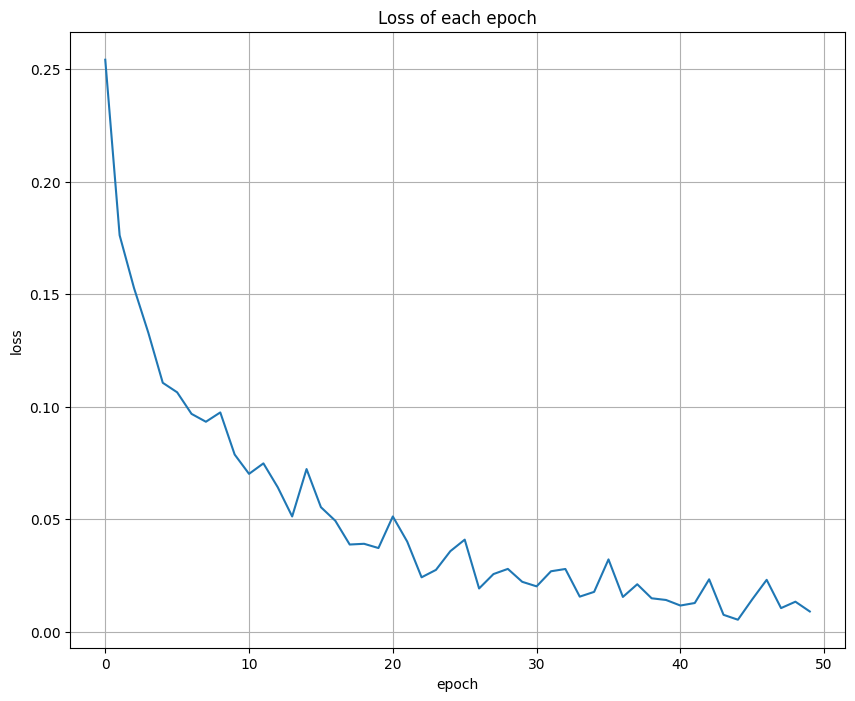

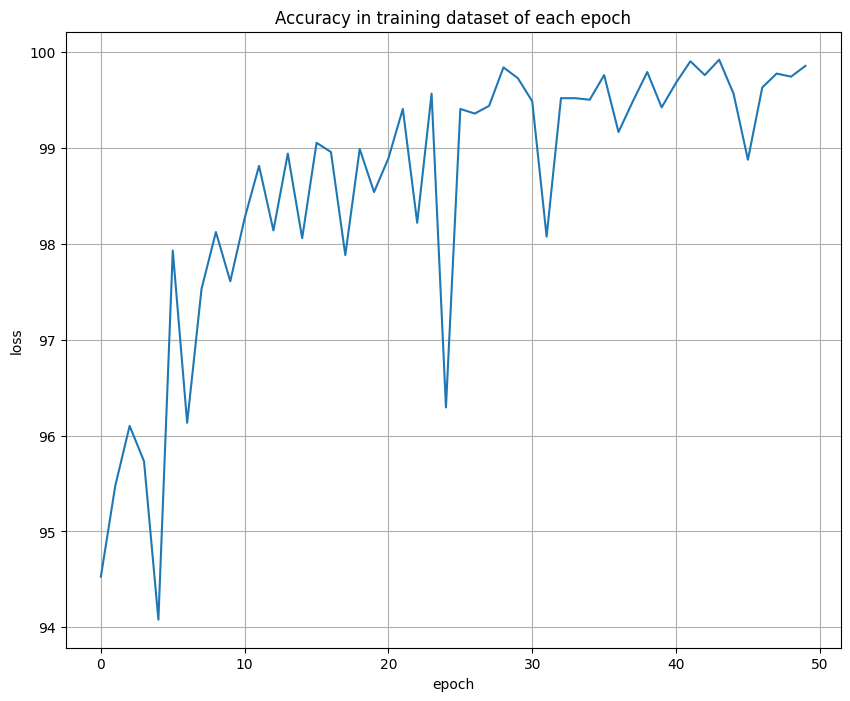

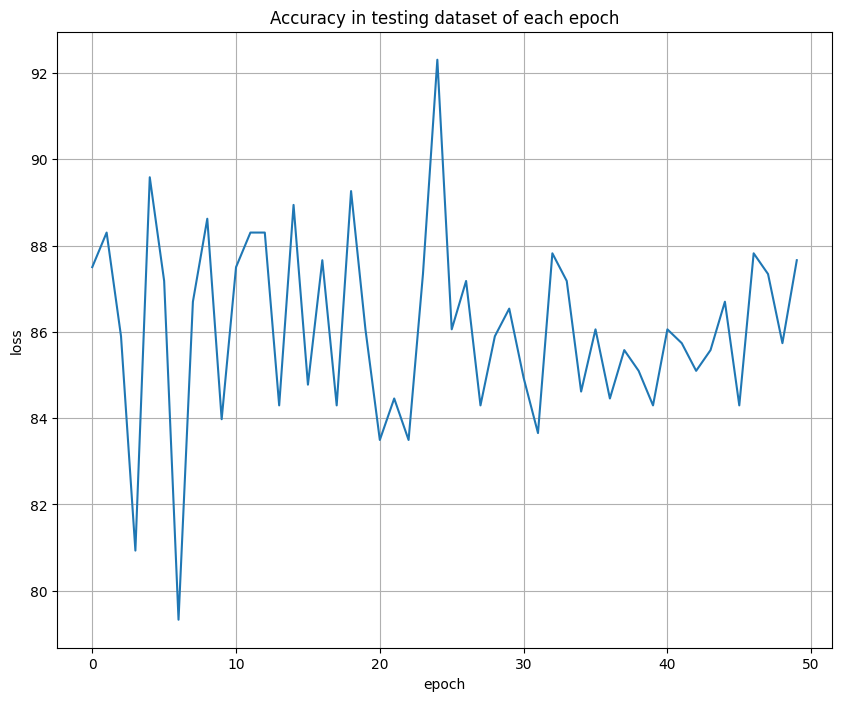

In [39]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.plot(np.arange(len(avg_cost)), avg_cost)
ax.set_title('Loss of each epoch')
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
ax.grid(True)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.plot(np.arange(len(train_acc)), train_acc)
ax.set_title('Accuracy in training dataset of each epoch')
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
ax.grid(True)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.plot(np.arange(len(test_acc)), test_acc)
ax.set_title('Accuracy in testing dataset of each epoch')
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
ax.grid(True)
plt.show()

In [4]:
ac = np.load('pathmnist.npz')
ac.files

['train_images',
 'val_images',
 'test_images',
 'train_labels',
 'val_labels',
 'test_labels']

In [5]:
x_train, y_train = ac['train_images'], ac['train_labels']
x_val, y_val = ac['val_images'], ac['val_labels']
x_test, y_test= ac['test_images'], ac['test_labels']
x_train, y_train = np.vstack((x_train, x_val)), np.vstack((y_train, y_val))

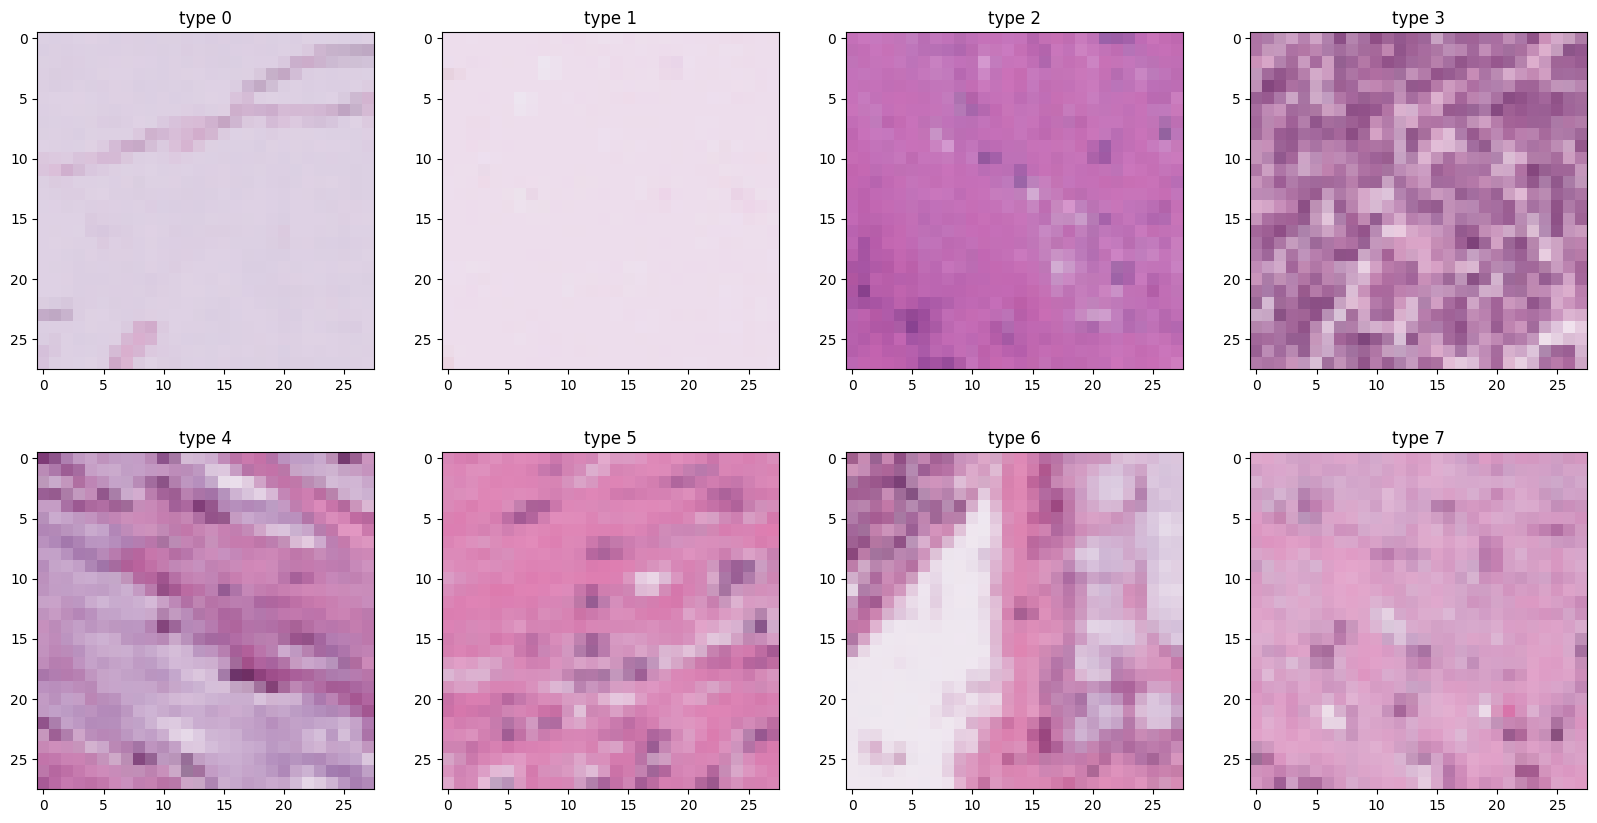

In [6]:
fig = plt.figure(figsize=(20,10))
for i in range(8):
    ax = fig.add_subplot(2, 4, i+1)
    ax.imshow(x_train[np.where(y_train==i)[0][0]])
    ax.set_title('type {}'.format(i))
plt.show()

In [7]:
class Augment():
    def __init__(self):
        self.inv_prob = 0.5
        self.blur_prob = 0.3
        self.sq_blur_prob = 0.3
        self.bright_prob = 0.5
        self.rotate_prob = 1.
        self.gray_prob = 0.0
 
    def invert(self, image): 
        return 255 - image
 
    def blur(self, image):
        return cv2.blur(image, (3, 3))
 
    def sq_blur(self, image):
        image = cv2.resize(image, (28, 28), interpolation=cv2.INTER_AREA)
        return image
 
    def random_brightness(self, image): 
        c = random.uniform(0.4, 1.2)
        blank = np.zeros(image.shape, image.dtype)
        dst = cv2.addWeighted(image, c, blank, 1 - c, 0)
        return dst
 
    def rotate(self, image, scale=1.0): 
        angle = random.uniform(-10, 10)
        h, w = image.shape[:2]
        center = (w // 2, h // 2)
        M = cv2.getRotationMatrix2D(center, angle, scale)
        rotated = cv2.warpAffine(image, M, (w, h))
        return rotated
 
    def gray_scale(self, image):
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        dst = cv2.merge((gray, gray, gray))
        return dst
 
    def apply(self, image):
        inv_prob = random.random()
        blur_prob = random.random()
        sq_blur_prob = random.random()
        bright_prob = random.random()
        rotate_prob = random.random()
 
        if inv_prob < self.inv_prob:
            image = self.invert(image)
 
        if bright_prob < self.bright_prob:
            image = self.random_brightness(image)
 
        if rotate_prob < self.rotate_prob:
            image = self.rotate(image)
 
        if blur_prob < self.blur_prob:
            image = self.blur(image)
 
        if sq_blur_prob < self.sq_blur_prob:
            image = self.sq_blur(image)
 
        return image

In [8]:
x_train_aug = []
y_train_aug = []
aug = Augment()
for i in range(50000):
    idx = random.randint(0, len(x_train)-1)
    fig = x_train[idx]
    y = y_train[idx]
    fig_t = aug.apply(fig)
    x_train_aug.append(fig_t)
    y_train_aug.append(y)
x_train_aug, y_train_aug = np.array(x_train_aug), np.array(y_train_aug)
x_train_aug, y_train_aug = np.vstack((x_train, x_train_aug)), np.vstack((y_train, y_train_aug))

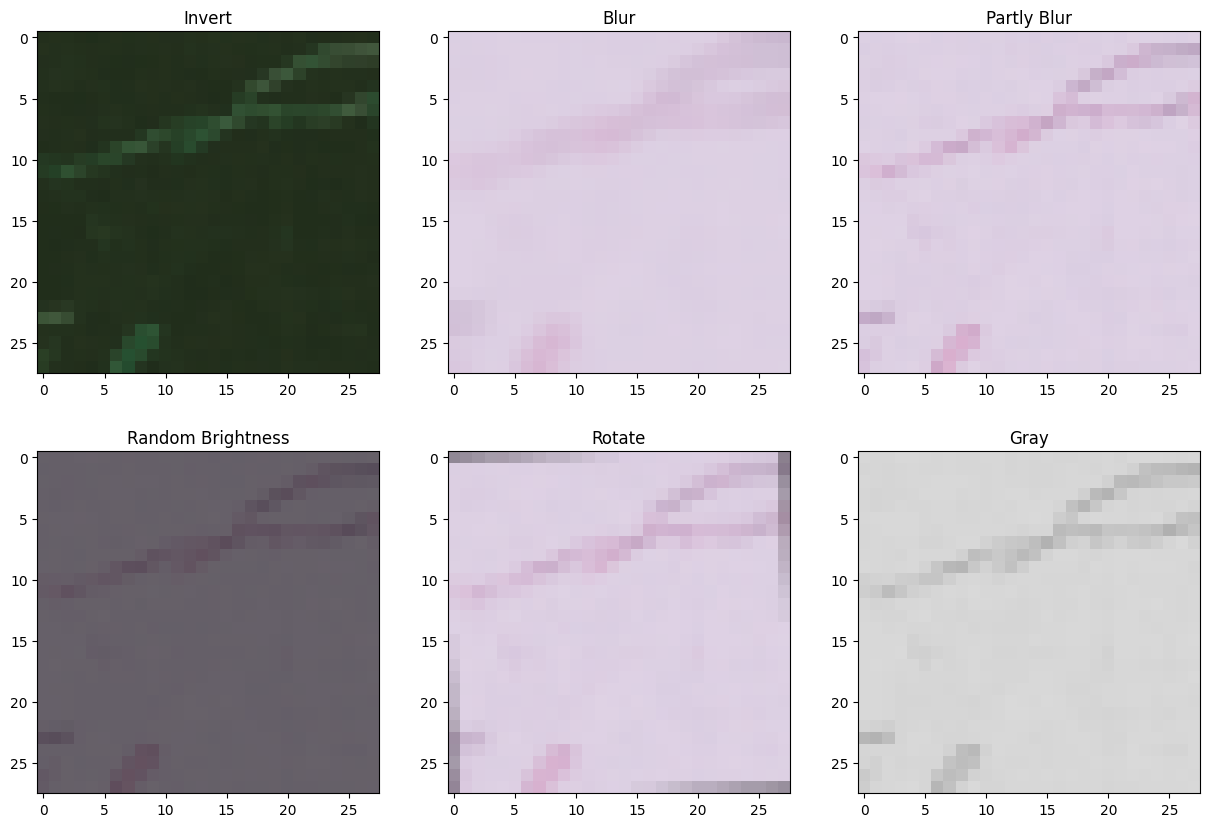

In [9]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(2,3,1)
ax.imshow(aug.invert(x_train[0]))
ax.set_title('Invert')
ax = fig.add_subplot(2,3,2)
ax.imshow(aug.blur(x_train[0]))
ax.set_title('Blur')
ax = fig.add_subplot(2,3,3)
ax.imshow(aug.sq_blur(x_train[0]))
ax.set_title('Partly Blur')
ax = fig.add_subplot(2,3,4)
ax.imshow(aug.random_brightness(x_train[0]))
ax.set_title('Random Brightness')
ax = fig.add_subplot(2,3,5)
ax.imshow(aug.rotate(x_train[0]))
ax.set_title('Rotate')
ax = fig.add_subplot(2,3,6)
ax.imshow(aug.gray_scale(x_train[0]))
ax.set_title('Gray')
plt.show()

In [13]:
x_train_aug, x_test = x_train_aug/255, x_test/255
x_train_aug = x_train_aug.reshape(-1, 28*28*3)
x_test = x_test.reshape(-1, 28*28*3)
y_train_aug = y_train_aug.ravel()
y_test = y_test.ravel()

In [34]:
num_folds = 10
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
model = KNeighborsClassifier()
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}
grid_search = GridSearchCV(model, param_grid, cv=kf, scoring='accuracy')
grid_search.fit(x_train_aug, y_train_aug)
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Accuracy: {grid_search.best_score_}')

Best Parameters: {'n_neighbors': 3}
Best Accuracy: 0.3186333333333333


In [35]:
to = time()
clf = KNeighborsClassifier(**grid_search.best_params_).fit(x_train.reshape(-1, 28*28*3), y_train.ravel())
print('Training time: {:.5f}s'.format(time() - to))
predictions_labels = clf.predict(x_test.reshape(-1, 28*28*3))
print('Evaluation:')
print((classification_report(y_test, predictions_labels)))

Training time: 0.00552s
Evaluation:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1338
           1       0.12      1.00      0.21       847
           2       0.00      0.00      0.00       339
           3       0.00      0.00      0.00       634
           4       0.00      0.00      0.00      1035
           5       0.00      0.00      0.00       592
           6       0.00      0.00      0.00       741
           7       0.00      0.00      0.00       421
           8       0.00      0.00      0.00      1233

    accuracy                           0.12      7180
   macro avg       0.01      0.11      0.02      7180
weighted avg       0.01      0.12      0.02      7180



c:\Users\sam\.conda\envs\AMLS\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\sam\.conda\envs\AMLS\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\sam\.conda\envs\AMLS\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
num_folds = 10
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
param_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [0.1, 1, 10, 100], 'decision_function_shape':{"ovo", "ovr"}},
              {'kernel': ['linear'], 'C': [0.1, 1, 10, 100], 'decision_function_shape':{"ovo", "ovr"}}]
model = svm.SVC()
grid_search = GridSearchCV(model, param_grid, cv=kf, scoring='accuracy')
grid_search.fit(x_train_aug, y_train_aug)
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Accuracy: {grid_search.best_score_}')

In [ ]:
to =time()
clf = svm.SVC(**grid_search.best_params_).fit(x_train_aug, y_train_aug)
print('Training time: {:.5f}s'.format(time() - to))
predictions_labels = clf.predict(x_test)
print('\r\nEvaluation:')
print((classification_report(y_test, predictions_labels)))

In [14]:
NUM_EPOCHS = 50
BATCH_SIZE = 128
NUM_CLASSES = 9
GRAYSCALE = False
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

data_transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=[.5], std=[.5])])

PathMNIST_train = get_dataset(x_train_aug, y_train_aug, transforms=data_transform)
PathMNIST_train = DataLoader(PathMNIST_train, batch_size=BATCH_SIZE, shuffle=True)

PathMNIST_test = get_dataset(x_test, y_test, transforms=data_transform)
PathMNIST_test = DataLoader(PathMNIST_test, batch_size=BATCH_SIZE, shuffle=True)

In [56]:
class MLP(torch.nn.Module):

    def __init__(self, input_num, output_num, hidden_layers:tuple):

        super(MLP, self).__init__()
        self.linear1 = torch.nn.Linear(input_num, hidden_layers[0])
        self.relu1 = torch.nn.ReLU()
        self.linear_hidden = []
        for i in range(len(hidden_layers)):
            if i == len(hidden_layers) - 1:
                self.linear_hidden.append(torch.nn.Linear(hidden_layers[-1], hidden_layers[-1]))
            else:
                self.linear_hidden.append(torch.nn.Linear(hidden_layers[i], hidden_layers[i+1]))
        self.linear2 = nn.Sequential(*self.linear_hidden)
        self.relu2 = torch.nn.ReLU()
        self.linear3 = torch.nn.Linear(hidden_layers[-1], output_num)

    # def __init__(self, num_i, num_h, num_o):
    #     super(MLP, self).__init__()

    #     self.linear1 = torch.nn.Linear(num_i, num_h)
    #     self.relu1 = torch.nn.ReLU()
    #     self.linear2 = torch.nn.Linear(num_h, num_h)  # 2个隐层
    #     self.relu2 = torch.nn.ReLU()
    #     self.linear3 = torch.nn.Linear(num_h, num_o)

    def forward(self, x):
        x = self.linear1(x)
        x = self.relu1(x)
        x = self.linear2(x)
        x = self.relu2(x)
        x = self.linear3(x)
        return x

In [57]:
def test(model, test_loader):
    model.eval()
    correct = 0
    for data in test_loader:
        inputs, lables = data
        inputs, lables = inputs.to(device), lables.to(device)
        inputs = torch.flatten(inputs, start_dim=1)
        outputs = model(inputs)
        _, id = torch.max(outputs.data, 1)
        correct += torch.sum(id == lables.data)
    return correct

Epoch: 001/050 | Batch 0000/1172 | Cost: 2.2096
Epoch: 001/050 | Batch 0050/1172 | Cost: 1.7125
Epoch: 001/050 | Batch 0100/1172 | Cost: 1.6905
Epoch: 001/050 | Batch 0150/1172 | Cost: 1.7542
Epoch: 001/050 | Batch 0200/1172 | Cost: 1.4918
Epoch: 001/050 | Batch 0250/1172 | Cost: 1.5578
Epoch: 001/050 | Batch 0300/1172 | Cost: 1.5906
Epoch: 001/050 | Batch 0350/1172 | Cost: 1.4828
Epoch: 001/050 | Batch 0400/1172 | Cost: 1.5463
Epoch: 001/050 | Batch 0450/1172 | Cost: 1.5113
Epoch: 001/050 | Batch 0500/1172 | Cost: 1.5097
Epoch: 001/050 | Batch 0550/1172 | Cost: 1.3400
Epoch: 001/050 | Batch 0600/1172 | Cost: 1.5398
Epoch: 001/050 | Batch 0650/1172 | Cost: 1.4670
Epoch: 001/050 | Batch 0700/1172 | Cost: 1.3321
Epoch: 001/050 | Batch 0750/1172 | Cost: 1.4929
Epoch: 001/050 | Batch 0800/1172 | Cost: 1.4483
Epoch: 001/050 | Batch 0850/1172 | Cost: 1.3052
Epoch: 001/050 | Batch 0900/1172 | Cost: 1.3538
Epoch: 001/050 | Batch 0950/1172 | Cost: 1.2237
Epoch: 001/050 | Batch 1000/1172 | Cost:

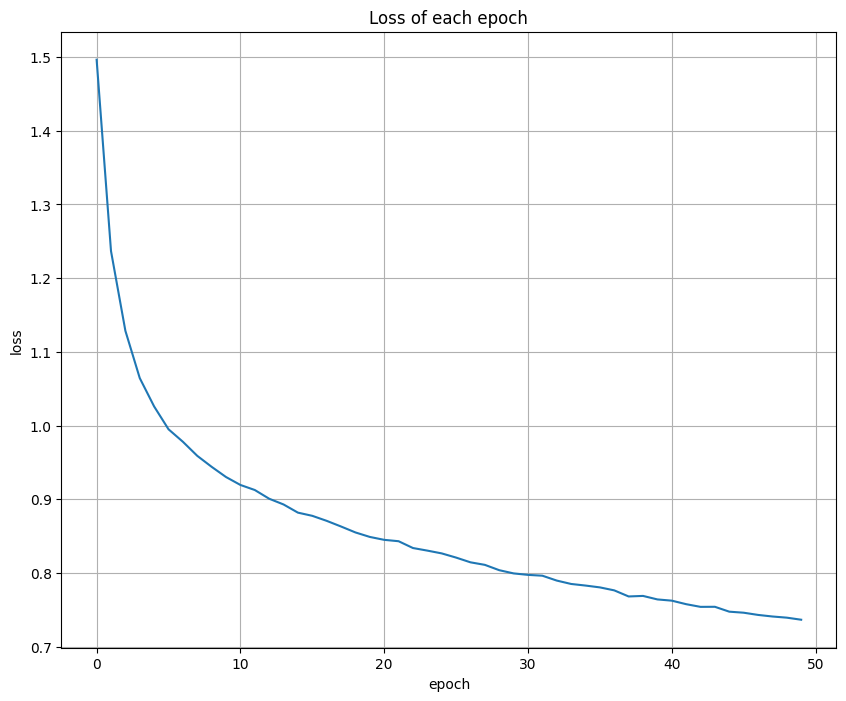

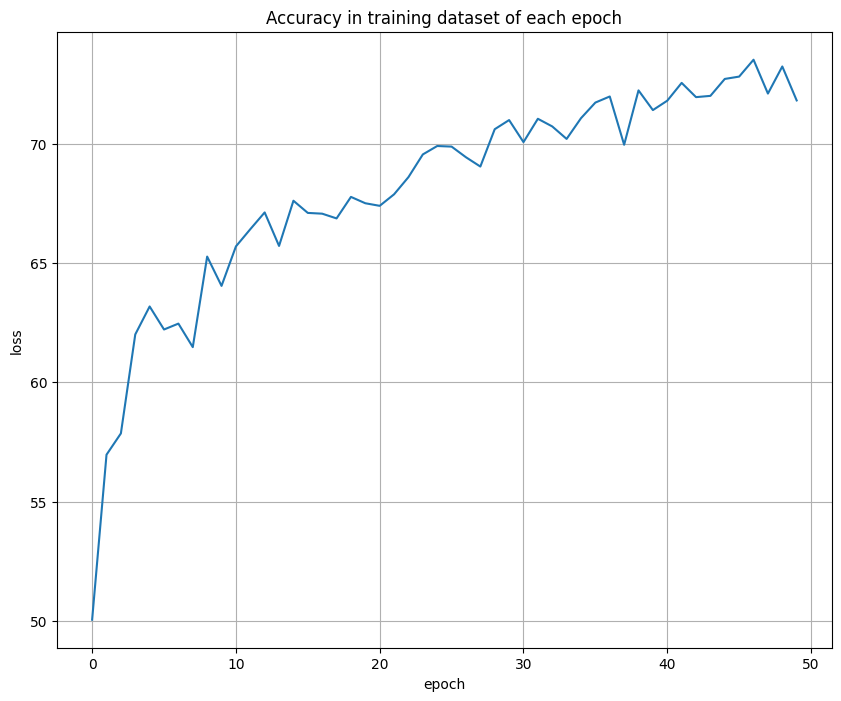

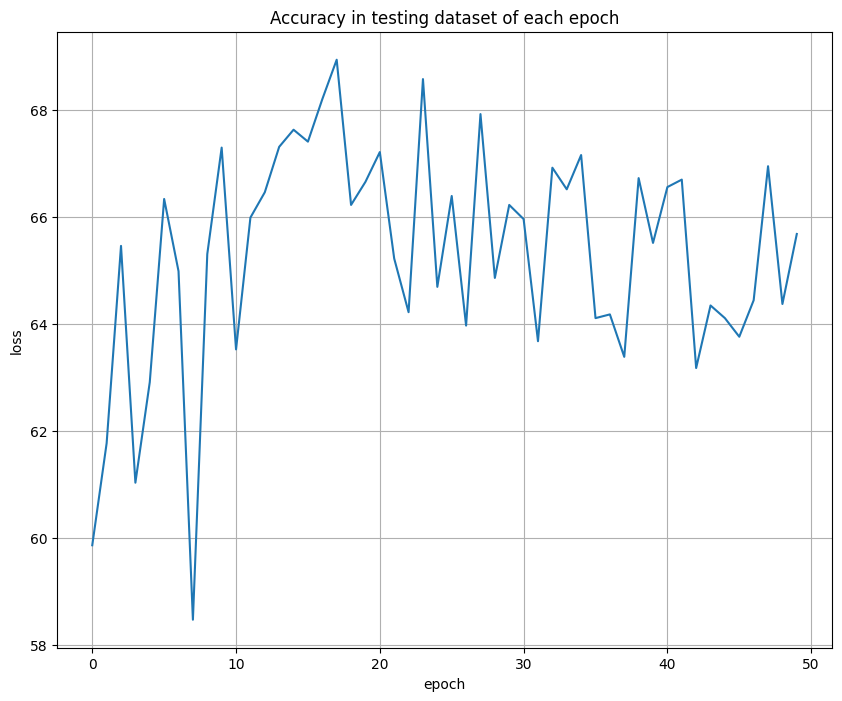

In [68]:
model = MLP(input_num=28*28*3, output_num=9, hidden_layers=(50,50))
# model = MLP(num_i=28*28*3, num_h=100, num_o=9)
model.to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3) 

avg_cost = []
train_acc = []
test_acc = []
to = time()
for epoch in range(NUM_EPOCHS):
    
    model.train()
    c = 0
    for batch_idx, (features, targets) in enumerate(PathMNIST_train):
        features = torch.flatten(features, start_dim=1)
        features = features.to(device)
        targets = targets.to(device)
        ### FORWARD AND BACK PROP
        logits= model(features)
        cost = F.cross_entropy(logits, targets)
        optimizer.zero_grad()
        
        cost.backward()
        
        ### UPDATE MODEL PARAMETERS
        optimizer.step()
        
        ### LOGGING
        if not batch_idx % 50:
            print ('Epoch: %03d/%03d | Batch %04d/%04d | Cost: %.4f' 
                   %(epoch+1, NUM_EPOCHS, batch_idx, 
                     len(PathMNIST_train), cost))
        c += cost
    avg_cost.append(c.item()/len(PathMNIST_train))
    with torch.no_grad():
        acc = test(model, PathMNIST_train) * 100 / 150000
        train_acc.append(acc.to("cpu"))
        print('Epoch: %03d/%03d | Train: %.3f%%' % (epoch+1, NUM_EPOCHS, acc))
        acc = test(model, PathMNIST_test) * 100 / 7180
        test_acc.append(acc.to("cpu"))
        print('Epoch: %03d/%03d | Test: %.3f%%' % (epoch+1, NUM_EPOCHS, acc))
        print('----------------------------------')
print("training time : %d s"%(time()-to))

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.plot(np.arange(len(avg_cost)), avg_cost)
ax.set_title('Loss of each epoch')
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
ax.grid(True)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.plot(np.arange(len(train_acc)), train_acc)
ax.set_title('Accuracy in training dataset of each epoch')
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
ax.grid(True)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.plot(np.arange(len(test_acc)), test_acc)
ax.set_title('Accuracy in testing dataset of each epoch')
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
ax.grid(True)
plt.show()

In [60]:
def resnet50(num_classes, grayscale):
    model = ResNet(block=BasicBlock, 
                   layers=[3, 4, 6, 3],
                   num_classes=num_classes,
                   grayscale=grayscale)
    return model

Epoch: 001/050 | Batch 0000/1172 | Cost: 2.5813
Epoch: 001/050 | Batch 0050/1172 | Cost: 1.3243
Epoch: 001/050 | Batch 0100/1172 | Cost: 1.3044
Epoch: 001/050 | Batch 0150/1172 | Cost: 1.2880
Epoch: 001/050 | Batch 0200/1172 | Cost: 1.3540
Epoch: 001/050 | Batch 0250/1172 | Cost: 1.0557
Epoch: 001/050 | Batch 0300/1172 | Cost: 1.0272
Epoch: 001/050 | Batch 0350/1172 | Cost: 0.9709
Epoch: 001/050 | Batch 0400/1172 | Cost: 0.9862
Epoch: 001/050 | Batch 0450/1172 | Cost: 1.0268
Epoch: 001/050 | Batch 0500/1172 | Cost: 0.9691
Epoch: 001/050 | Batch 0550/1172 | Cost: 0.8497
Epoch: 001/050 | Batch 0600/1172 | Cost: 0.9584
Epoch: 001/050 | Batch 0650/1172 | Cost: 0.8180
Epoch: 001/050 | Batch 0700/1172 | Cost: 0.8417
Epoch: 001/050 | Batch 0750/1172 | Cost: 0.9438
Epoch: 001/050 | Batch 0800/1172 | Cost: 0.9255
Epoch: 001/050 | Batch 0850/1172 | Cost: 0.7536
Epoch: 001/050 | Batch 0900/1172 | Cost: 0.6506
Epoch: 001/050 | Batch 0950/1172 | Cost: 0.8299
Epoch: 001/050 | Batch 1000/1172 | Cost:

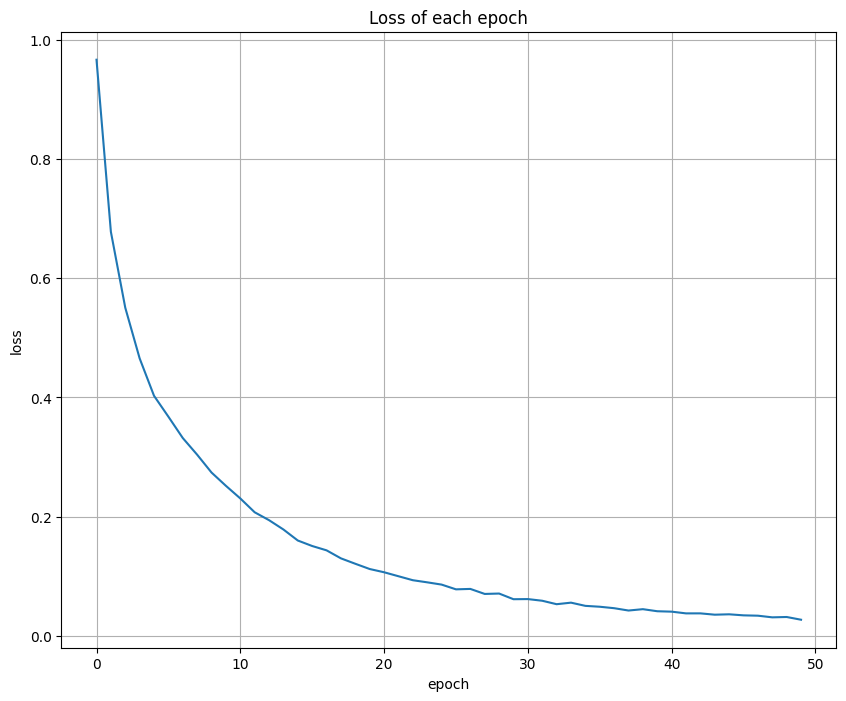

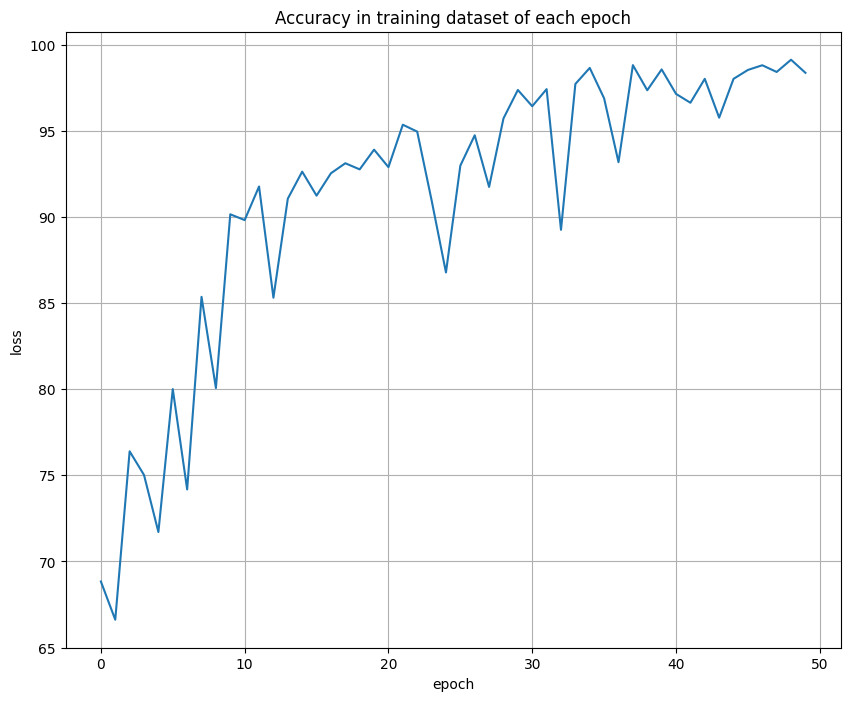

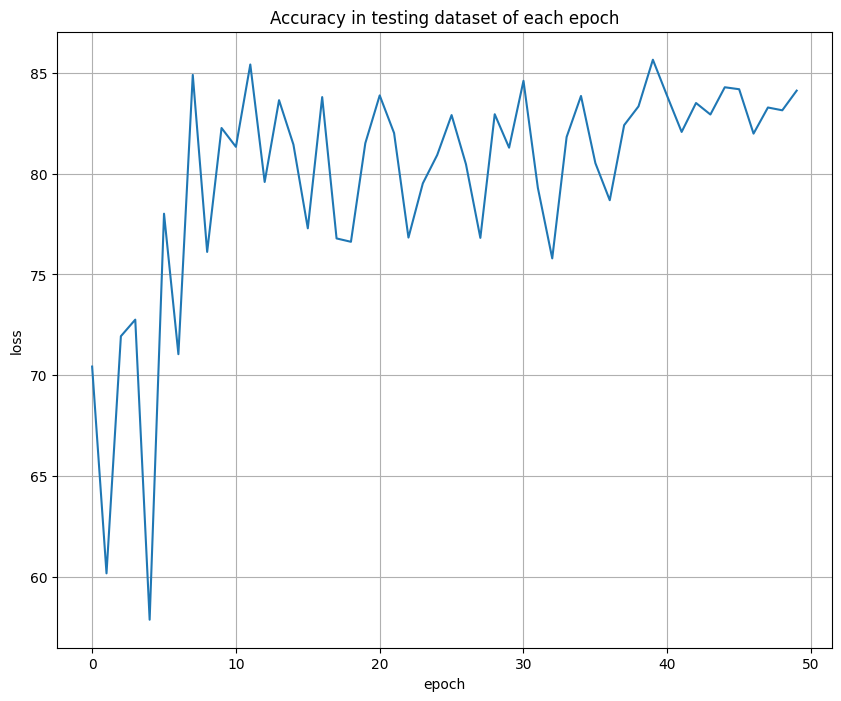

In [61]:
model = resnet50(NUM_CLASSES, GRAYSCALE)
model.to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3) 

avg_cost = []
train_acc = []
test_acc = []
to = time()
for epoch in range(NUM_EPOCHS):
    
    model.train()
    c = 0
    for batch_idx, (features, targets) in enumerate(PathMNIST_train):
        
        features = features.to(device)
        targets = targets.to(device)
            
        ### FORWARD AND BACK PROP
        logits, probas = model(features)
        cost = F.cross_entropy(logits, targets)
        optimizer.zero_grad()
        
        cost.backward()
        
        ### UPDATE MODEL PARAMETERS
        optimizer.step()
        
        ### LOGGING
        if not batch_idx % 50:
            print ('Epoch: %03d/%03d | Batch %04d/%04d | Cost: %.4f' 
                   %(epoch+1, NUM_EPOCHS, batch_idx, 
                     len(PathMNIST_train), cost))
        c += cost
    avg_cost.append(c.item()/len(PathMNIST_train))

    model.eval()
    with torch.set_grad_enabled(False): # save memory during inference
        acc = compute_accuracy(model, PathMNIST_train, device=device)
        train_acc.append(acc.item())
        print('Epoch: %03d/%03d | Train: %.3f%%' % (epoch+1, NUM_EPOCHS, acc))
        acc = compute_accuracy(model, PathMNIST_test, device=device)
        test_acc.append(acc.item())        
        print('Epoch: %03d/%03d | Test: %.3f%%' % (epoch+1, NUM_EPOCHS, acc))
        print('----------------------------------')
print("training time : %d s"%(time()-to))

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.plot(np.arange(len(avg_cost)), avg_cost)
ax.set_title('Loss of each epoch')
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
ax.grid(True)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.plot(np.arange(len(train_acc)), train_acc)
ax.set_title('Accuracy in training dataset of each epoch')
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
ax.grid(True)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.plot(np.arange(len(test_acc)), test_acc)
ax.set_title('Accuracy in testing dataset of each epoch')
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
ax.grid(True)
plt.show()